# Project Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

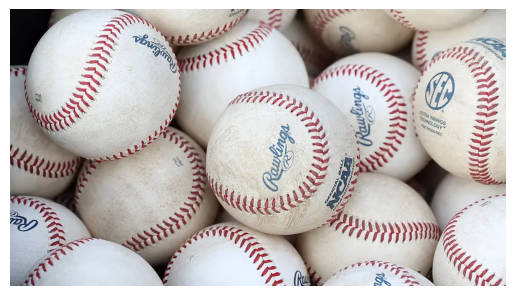

In [1]:
from PIL import Image
import matplotlib.pyplot as plt  # For displaying the image using matplotlib

# Define the image file path using a raw string (prefix with 'r')
image_path = "C:/Users/ssour/Downloads/Bag-of-baseballs.webp"
# Open an image file
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axes for image display
plt.show()

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Datasets

In [3]:
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv"
df = pd.read_csv(url)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In these datasets my target variable is Number of predicted wins (W)

In [4]:
# Here the top 10 data in these datasets
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
# Here the last 10 data in these datasets
df.tail(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
# Here the last 10 data in these datasets
df.tail(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
20,90,683,5527,1351,295,17,177,488,1290,51,613,557,3.43,1,14,50,88
21,83,703,5428,1363,265,13,177,539,1344,57,635,577,3.62,4,13,41,90
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77
23,67,573,5420,1361,251,18,100,471,1107,69,760,698,4.41,3,10,44,90
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
# Here we can see that the columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
df.shape

(30, 17)

Here we can see that 30 rows and 17 columns

In [9]:
print("The Dimensions of Datasets: ",df.shape)
print("The columns of the datasets: ",df.columns)

The Dimensions of Datasets:  (30, 17)
The columns of the datasets:  Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


In [10]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
# Now checking the datatypes
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [12]:
# Now separating numercial columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numercial_col :",numerical_col)

Numercial_col : ['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']


In [13]:
# Now we cheking the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Here we can see that there is no null values presnets in these datasets

<Axes: >

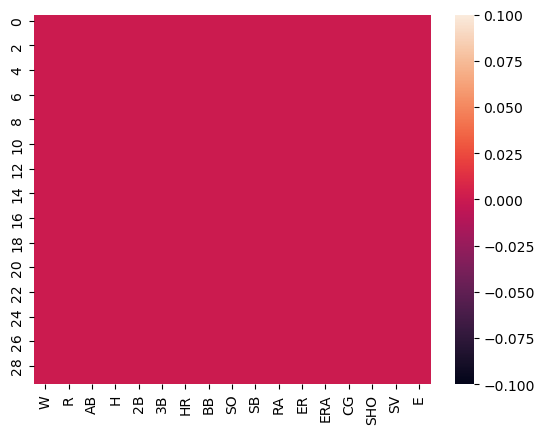

In [14]:
# Now check null values using heatmap
sns.heatmap(df.isnull())

In [15]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [16]:
# Checking number of uniqie values in ech column
df.nunique().to_frame("No. of unique values")

,No. of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


In [17]:
df["W"].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [18]:
df["R"].unique()

array([724, 696, 669, 622, 689, 891, 764, 713, 644, 748, 751, 729, 661,
       656, 694, 647, 697, 655, 640, 683, 703, 613, 573, 626, 667, 720,
       650, 737], dtype=int64)

In [19]:
df["AB"].unique()

array([5575, 5467, 5439, 5533, 5605, 5509, 5567, 5485, 5640, 5511, 5459,
       5417, 5544, 5600, 5484, 5631, 5491, 5480, 5571, 5527, 5428, 5463,
       5420, 5529, 5385, 5565, 5649, 5457, 5572], dtype=int64)

In [20]:
df["H"].unique()

array([1497, 1349, 1395, 1381, 1515, 1480, 1397, 1370, 1383, 1495, 1419,
       1363, 1331, 1379, 1405, 1386, 1462, 1341, 1378, 1382, 1351, 1420,
       1361, 1374, 1346, 1486, 1494, 1324, 1479], dtype=int64)

In [21]:
df["2B"].unique()

array([300, 277, 303, 260, 289, 308, 272, 246, 278, 294, 279, 243, 262,
       288, 292, 274, 257, 295, 265, 236, 251, 263], dtype=int64)

In [22]:
df["3B"].unique()

array([42, 44, 29, 27, 49, 17, 19, 20, 32, 33, 26, 21, 22, 46, 39, 30, 34,
       13, 40, 18, 37, 48, 36], dtype=int64)

In [23]:
df["HR"].unique()

array([139, 156, 141, 136, 151, 232, 212, 217, 167, 161, 172, 230, 176,
       198, 146, 137, 140, 171, 145, 177, 120, 100, 130, 187, 154, 148,
       186], dtype=int64)

In [24]:
df["BB"].unique()

array([383, 439, 533, 404, 455, 570, 554, 418, 436, 478, 503, 486, 435,
       475, 506, 461, 567, 412, 496, 488, 539, 375, 471, 387, 563, 457,
       490, 426, 388], dtype=int64)

In [25]:
df["SO"].unique()

array([ 973, 1264, 1157, 1231, 1259, 1151, 1227, 1331, 1310, 1148, 1233,
       1392, 1150, 1336, 1119, 1267, 1322, 1518, 1299, 1255, 1290, 1344,
       1107, 1274, 1258, 1159, 1312, 1327, 1283], dtype=int64)

In [26]:
df["CG"].unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

In [27]:
df["SHO"].unique()

array([ 8, 12, 10,  9,  4, 13, 15, 21,  7, 14, 18,  6], dtype=int64)

In [28]:
df["SB"].unique()

array([104,  70,  86,  68,  83,  88,  63,  44,  87,  71, 101, 121,  52,
        69,  78,  98,  95,  84, 134,  51,  57, 112,  59,  93, 132,  82,
        97], dtype=int64)

In [29]:
df["RA"].unique()

array([641, 700, 640, 701, 803, 670, 698, 693, 642, 753, 733, 618, 675,
       726, 729, 525, 596, 608, 737, 754, 613, 635, 678, 760, 809, 595,
       627, 713, 731, 844], dtype=int64)

In [30]:
df["ER"].unique()

array([601, 653, 584, 643, 746, 609, 652, 646, 604, 694, 680, 572, 630,
       677, 664, 478, 532, 546, 682, 700, 557, 577, 638, 698, 749, 553,
       597, 659, 655, 799], dtype=int64)

In [31]:
df["SV"].unique()

array([56, 45, 38, 37, 35, 34, 48, 43, 60, 40, 39, 46, 28, 62, 54, 50, 41,
       44, 47, 36], dtype=int64)

In [32]:
df["E"].unique()

array([ 88,  86,  79, 101,  93,  77,  95,  97, 119,  85,  94, 126,  96,
       122, 111, 116,  90, 117,  75,  78,  92], dtype=int64)

# Visualize the datasets

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


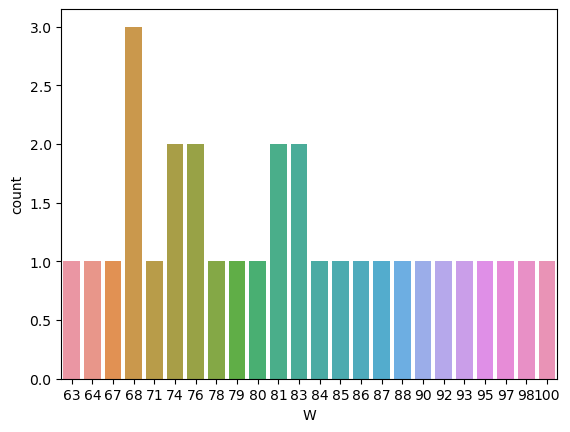

In [33]:
# visualize the number of  WINNINGS
ax=sns.countplot(x='W',data=df)
print(df['W'].value_counts())

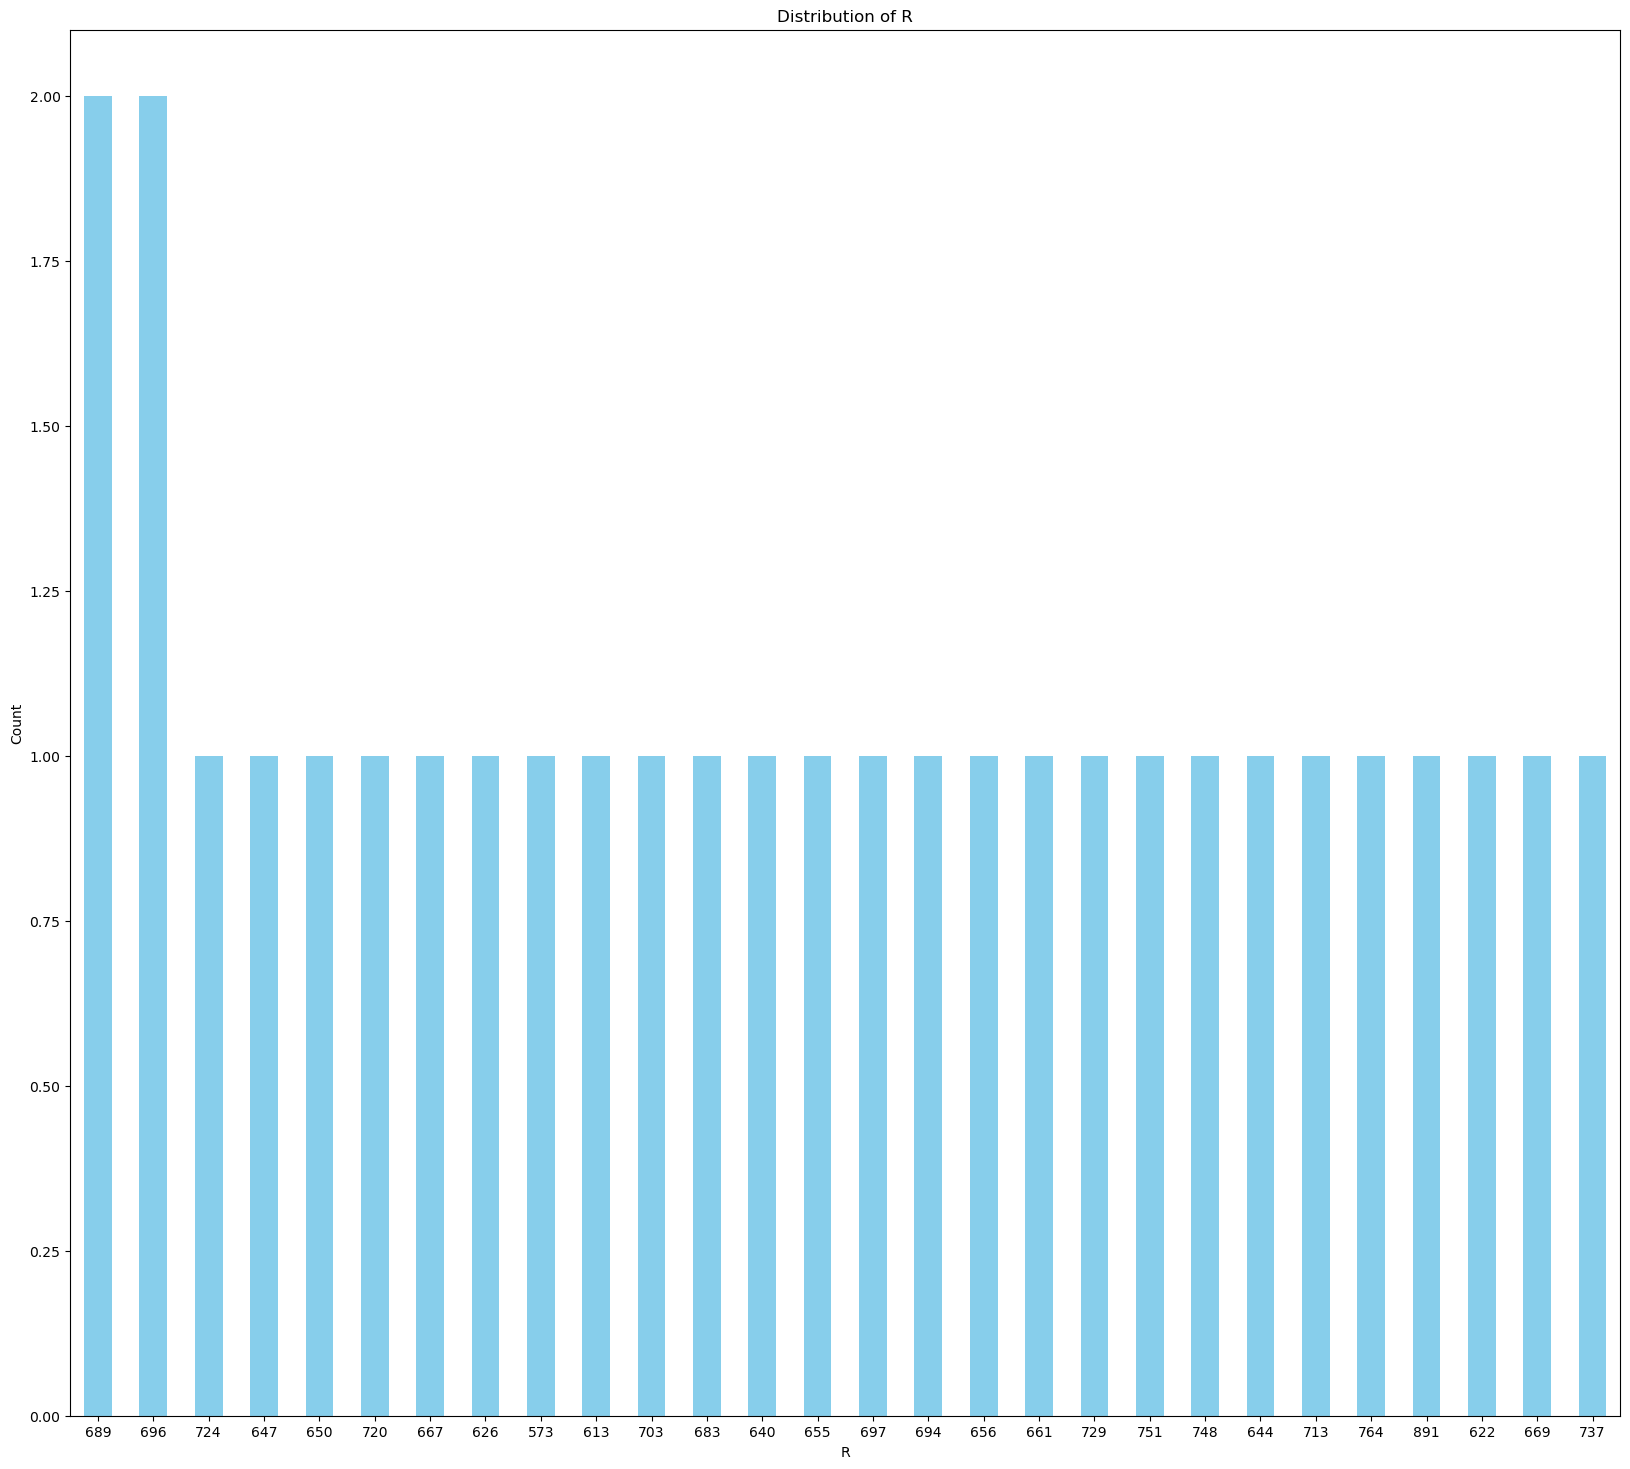

In [34]:
# Assuming df is your DataFrame and it has a column named 'RUNS'
job_counts = df["R"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of R")
plt.xlabel("R")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

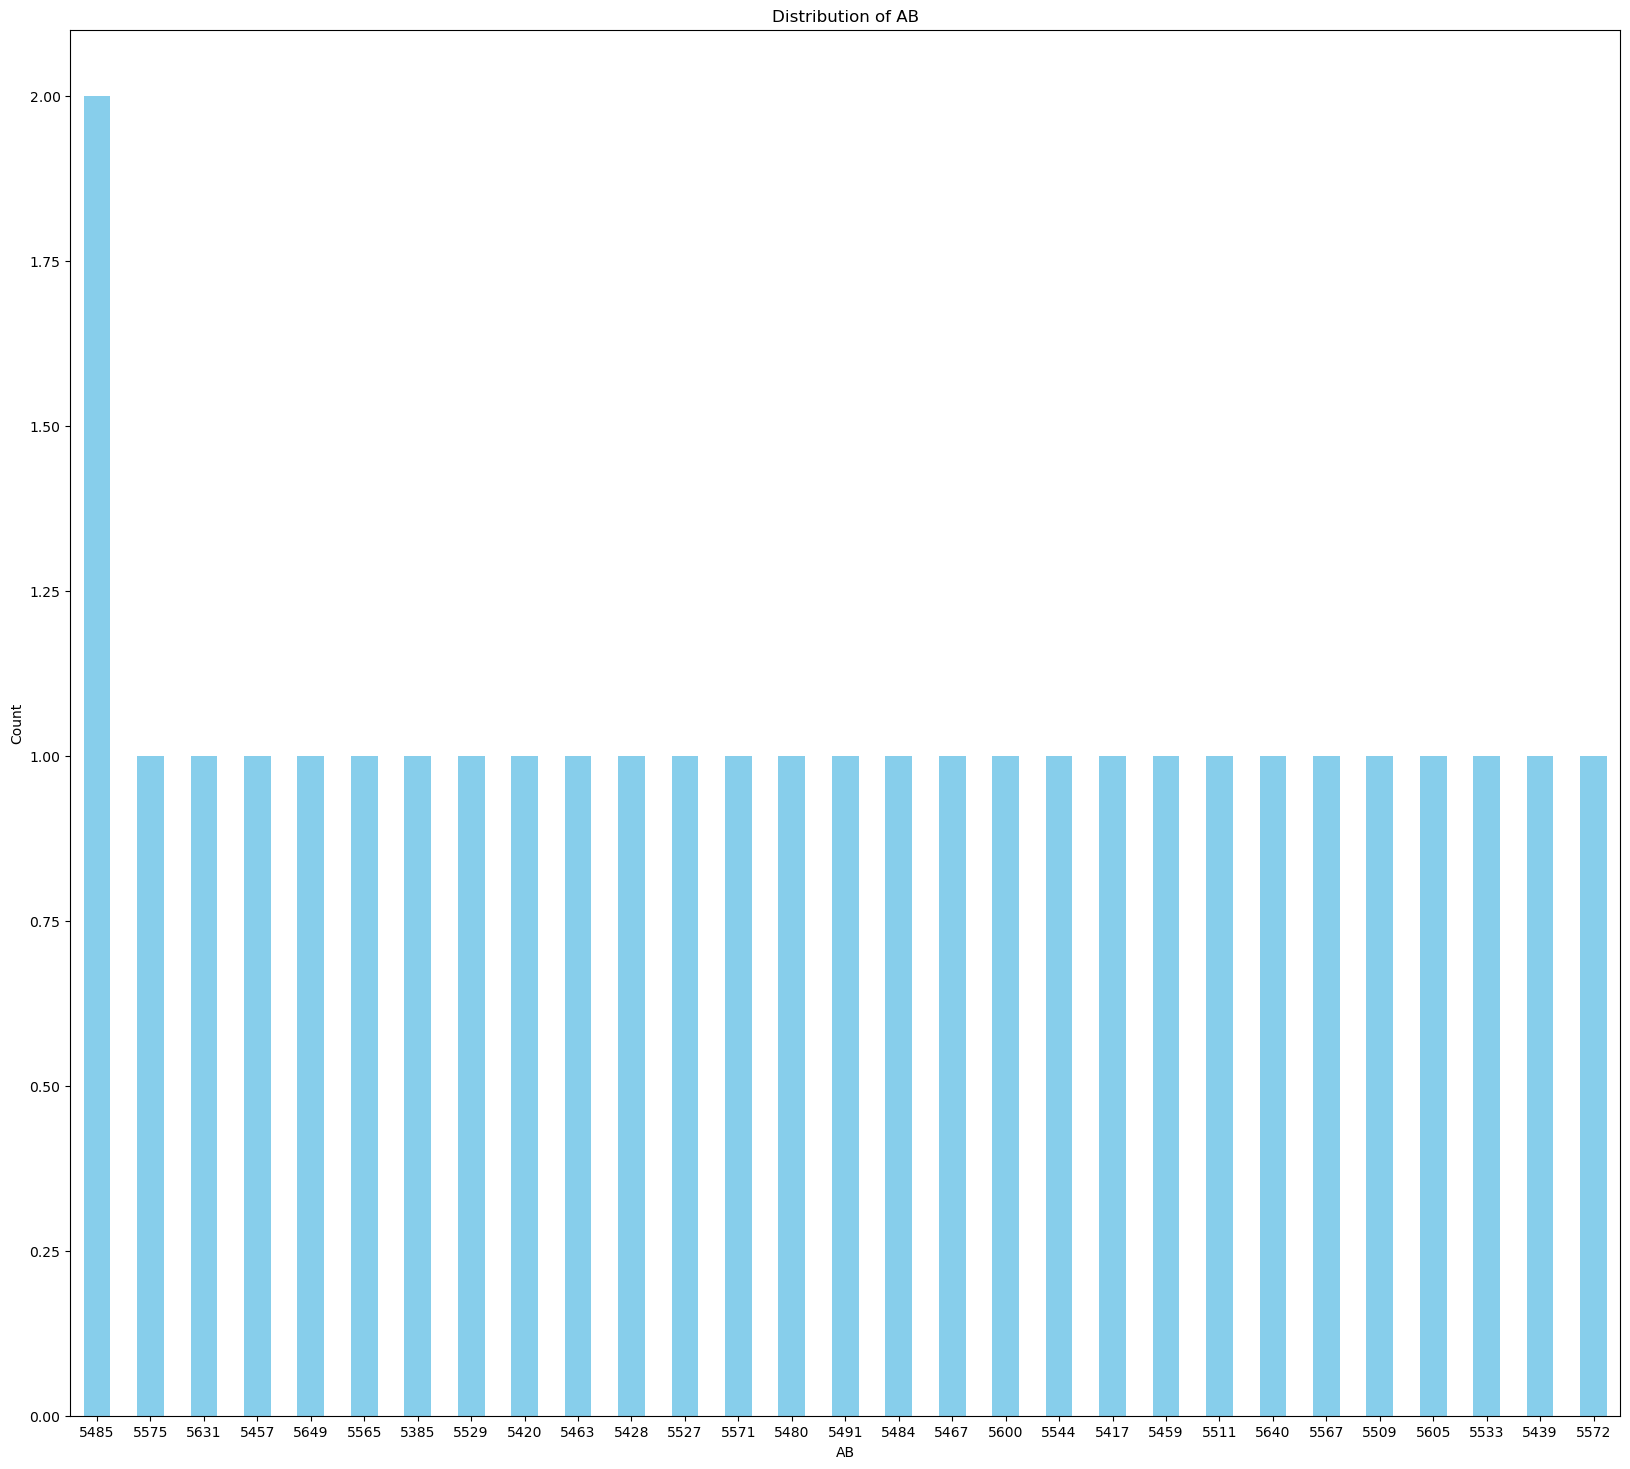

In [35]:
# Assuming df is your DataFrame and it has a column named 'AB'
job_counts = df["AB"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of AB")
plt.xlabel("AB")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

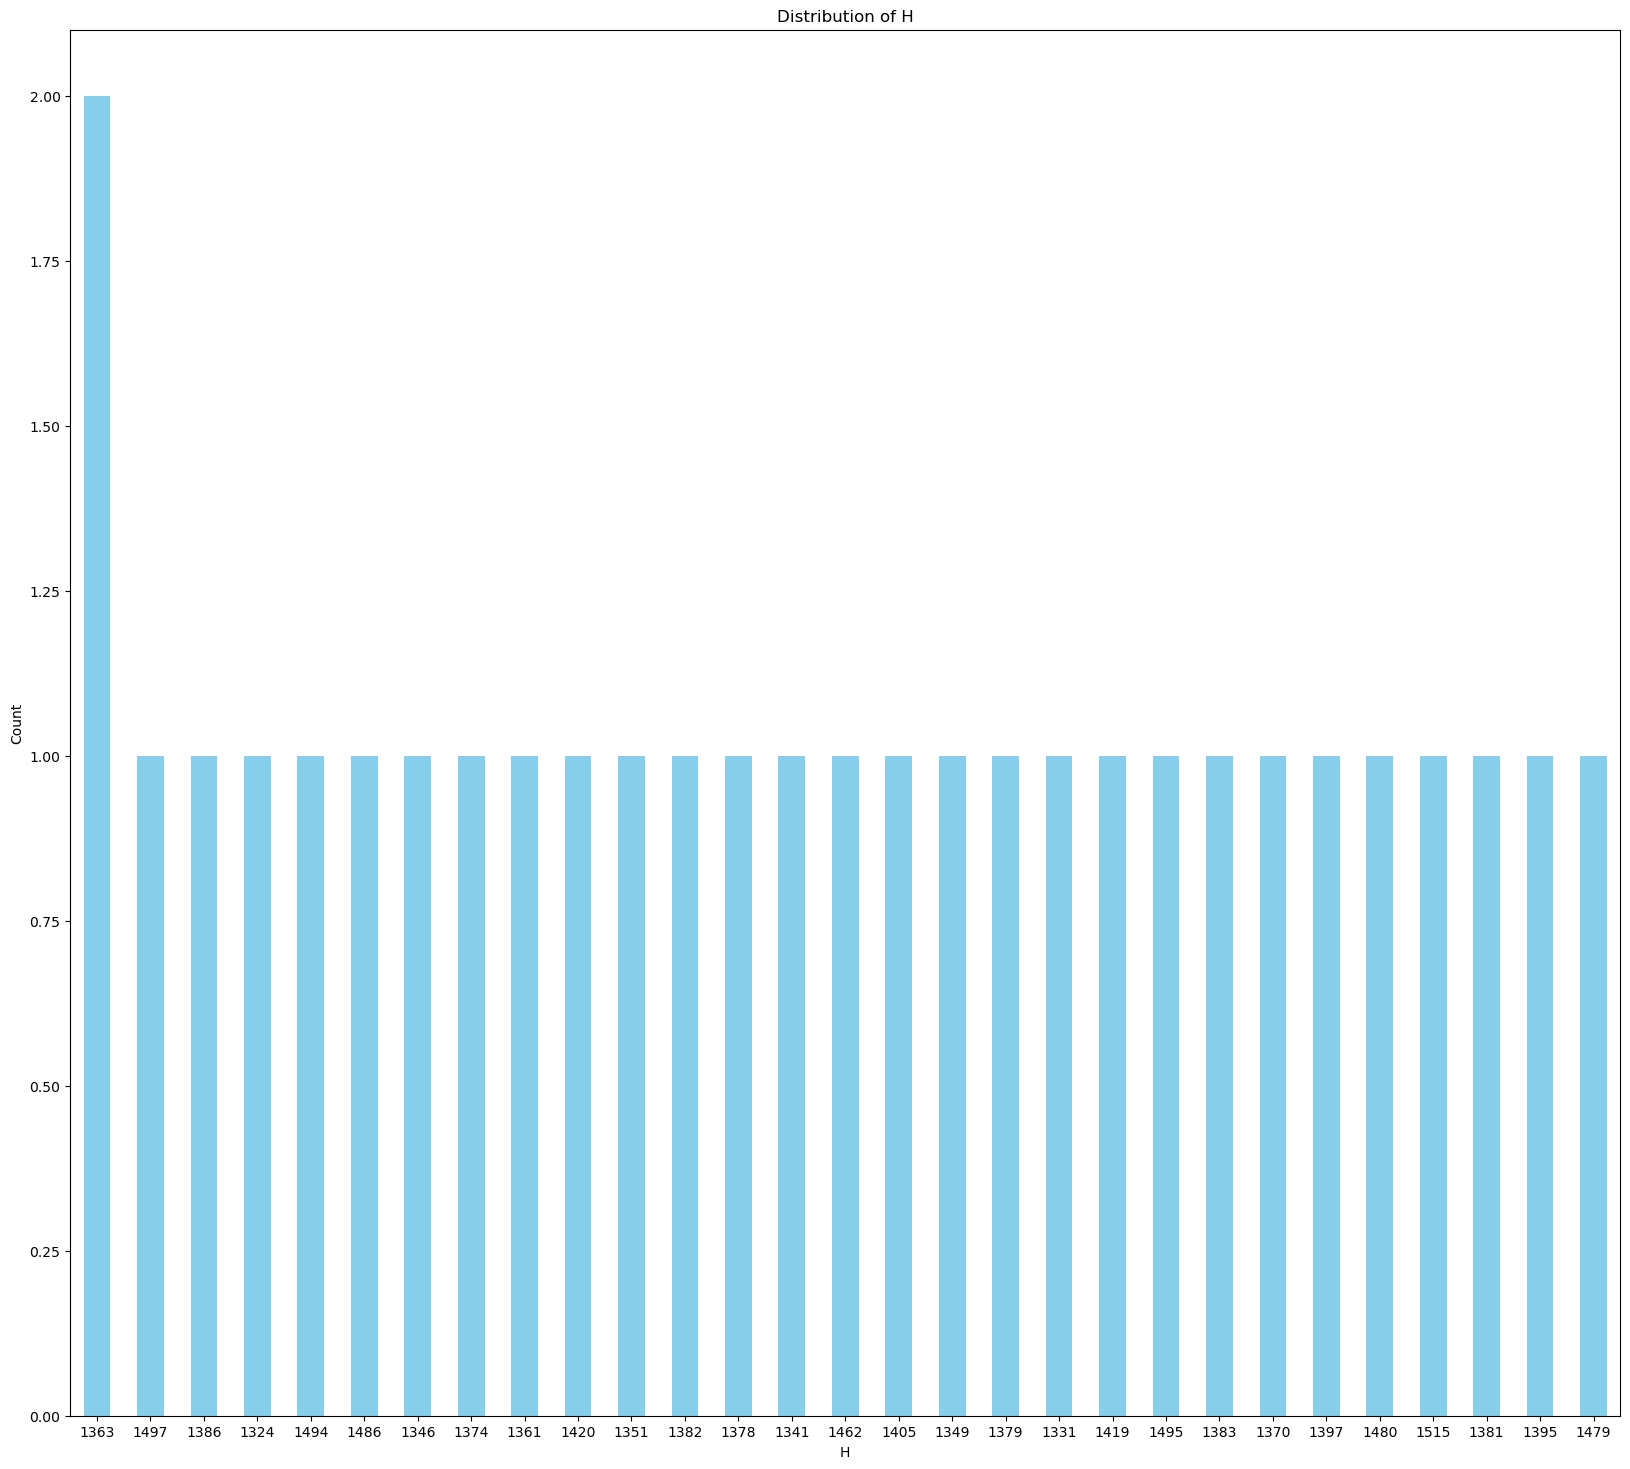

In [36]:
# Assuming df is your DataFrame and it has a column named 'H'
job_counts = df["H"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of H")
plt.xlabel("H")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

272    3
260    2
289    2
278    2
277    2
274    2
288    2
300    1
292    1
251    1
236    1
265    1
295    1
257    1
243    1
262    1
279    1
294    1
246    1
308    1
303    1
263    1
Name: 2B, dtype: int64


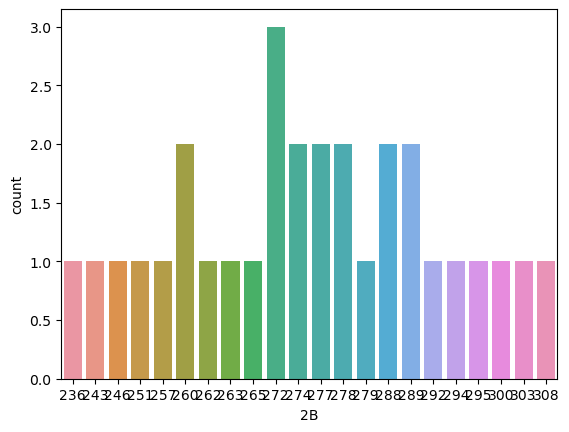

In [37]:
# visualize the number of  2B
ax=sns.countplot(x='2B',data=df)
print(df['2B'].value_counts())

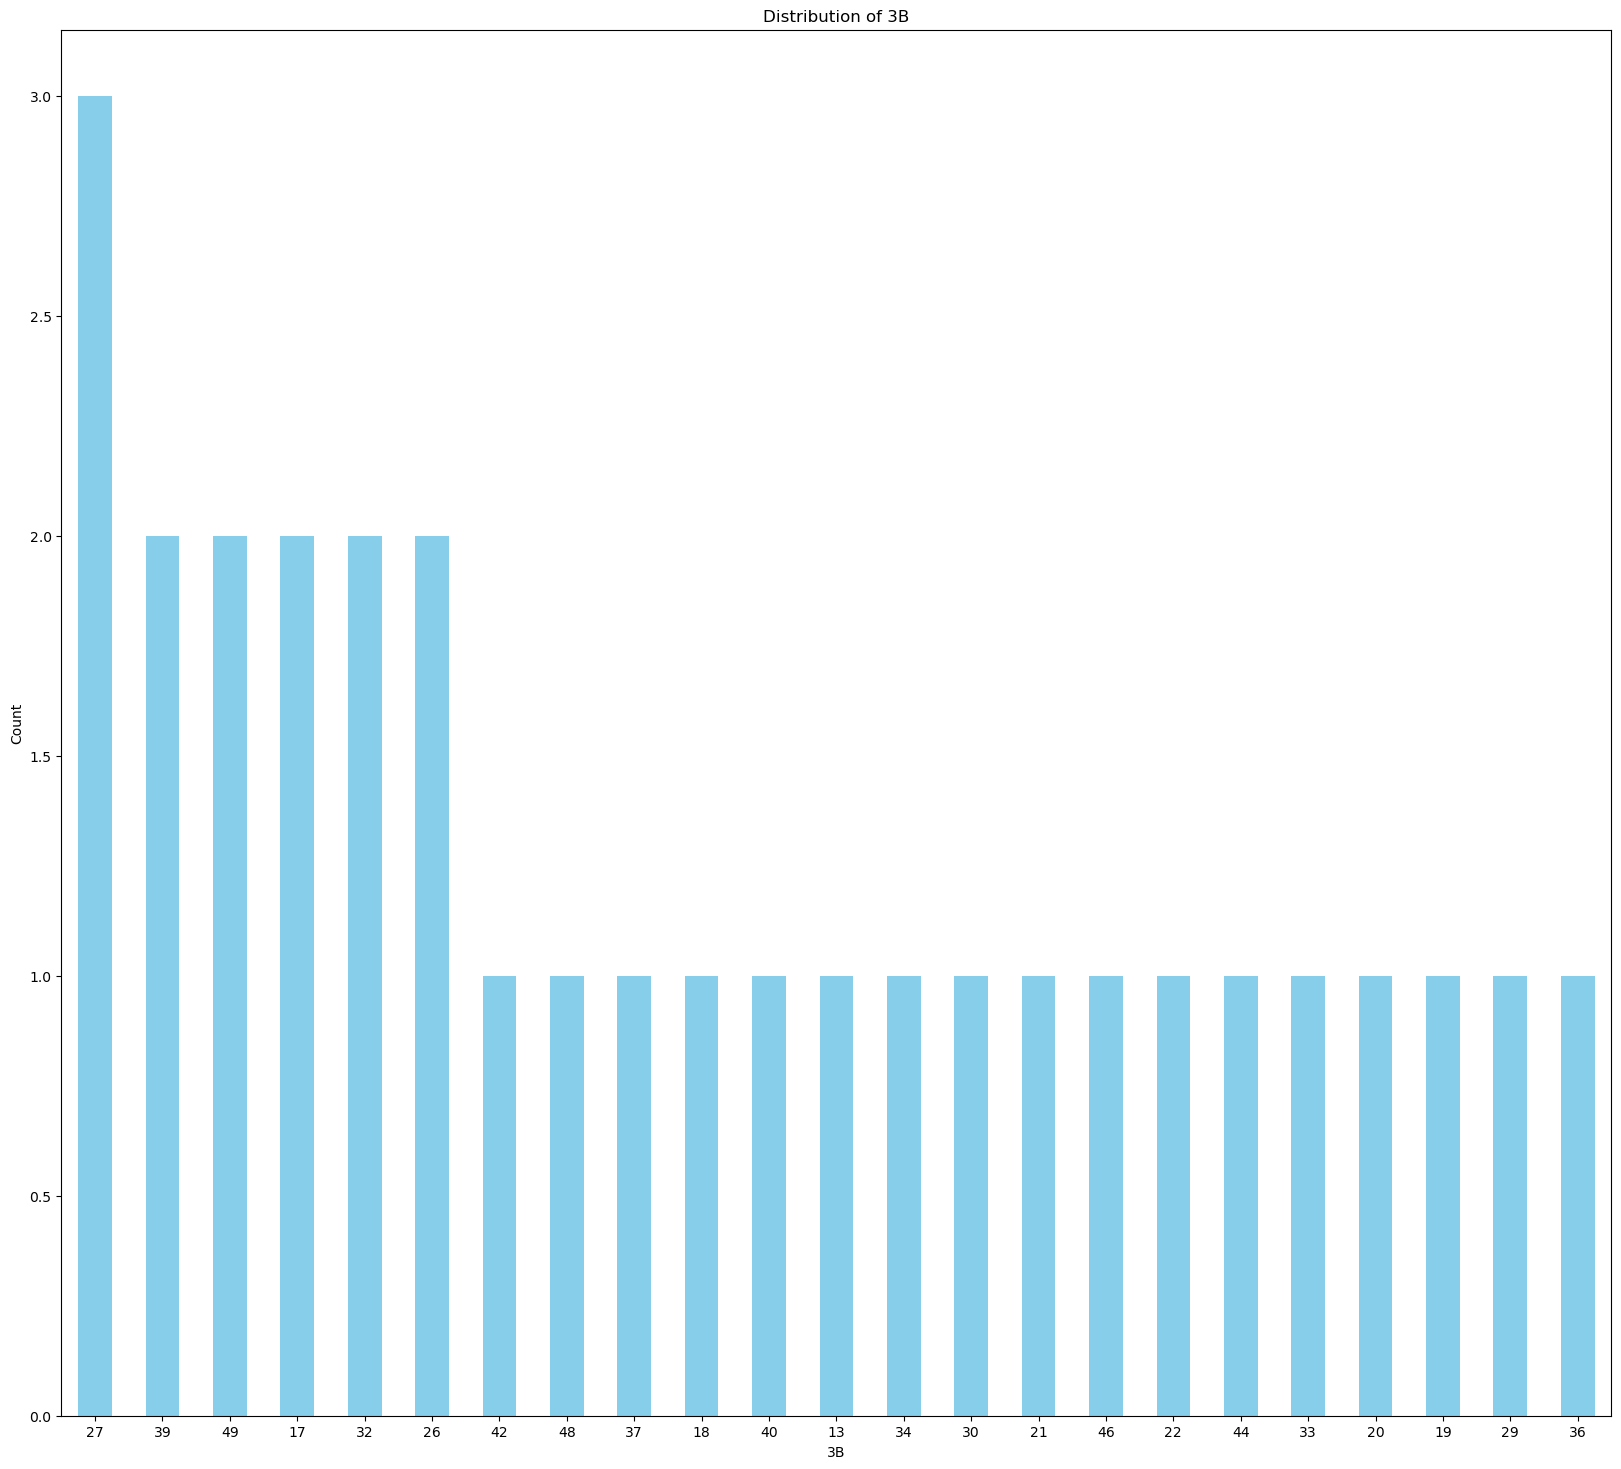

In [38]:
# Assuming df is your DataFrame and it has a column named '3B'
job_counts = df["3B"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of 3B")
plt.xlabel("3B")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

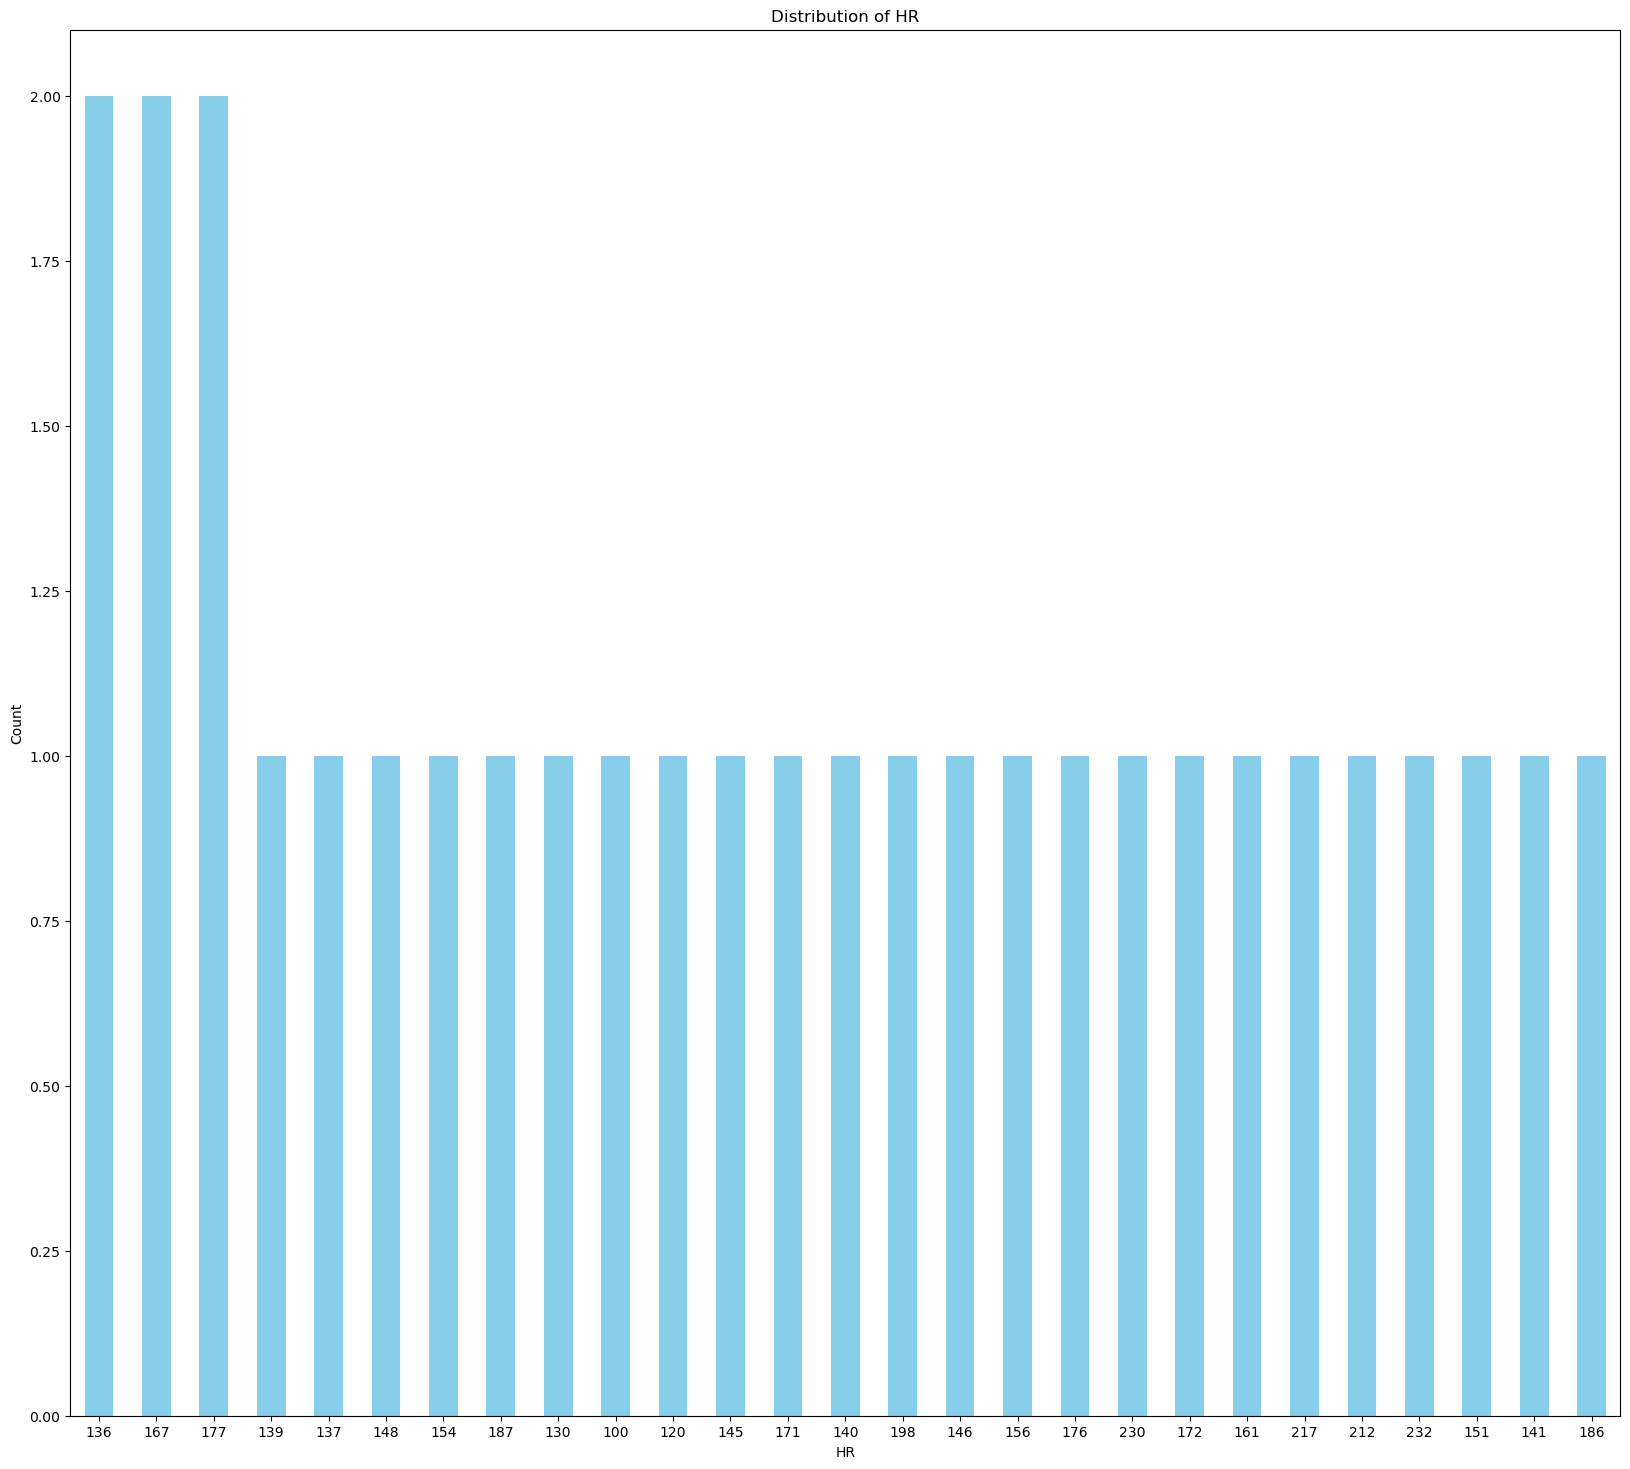

In [39]:
# Assuming df is your DataFrame and it has a column named 'HR'
job_counts = df["HR"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of HR")
plt.xlabel("HR")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [40]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

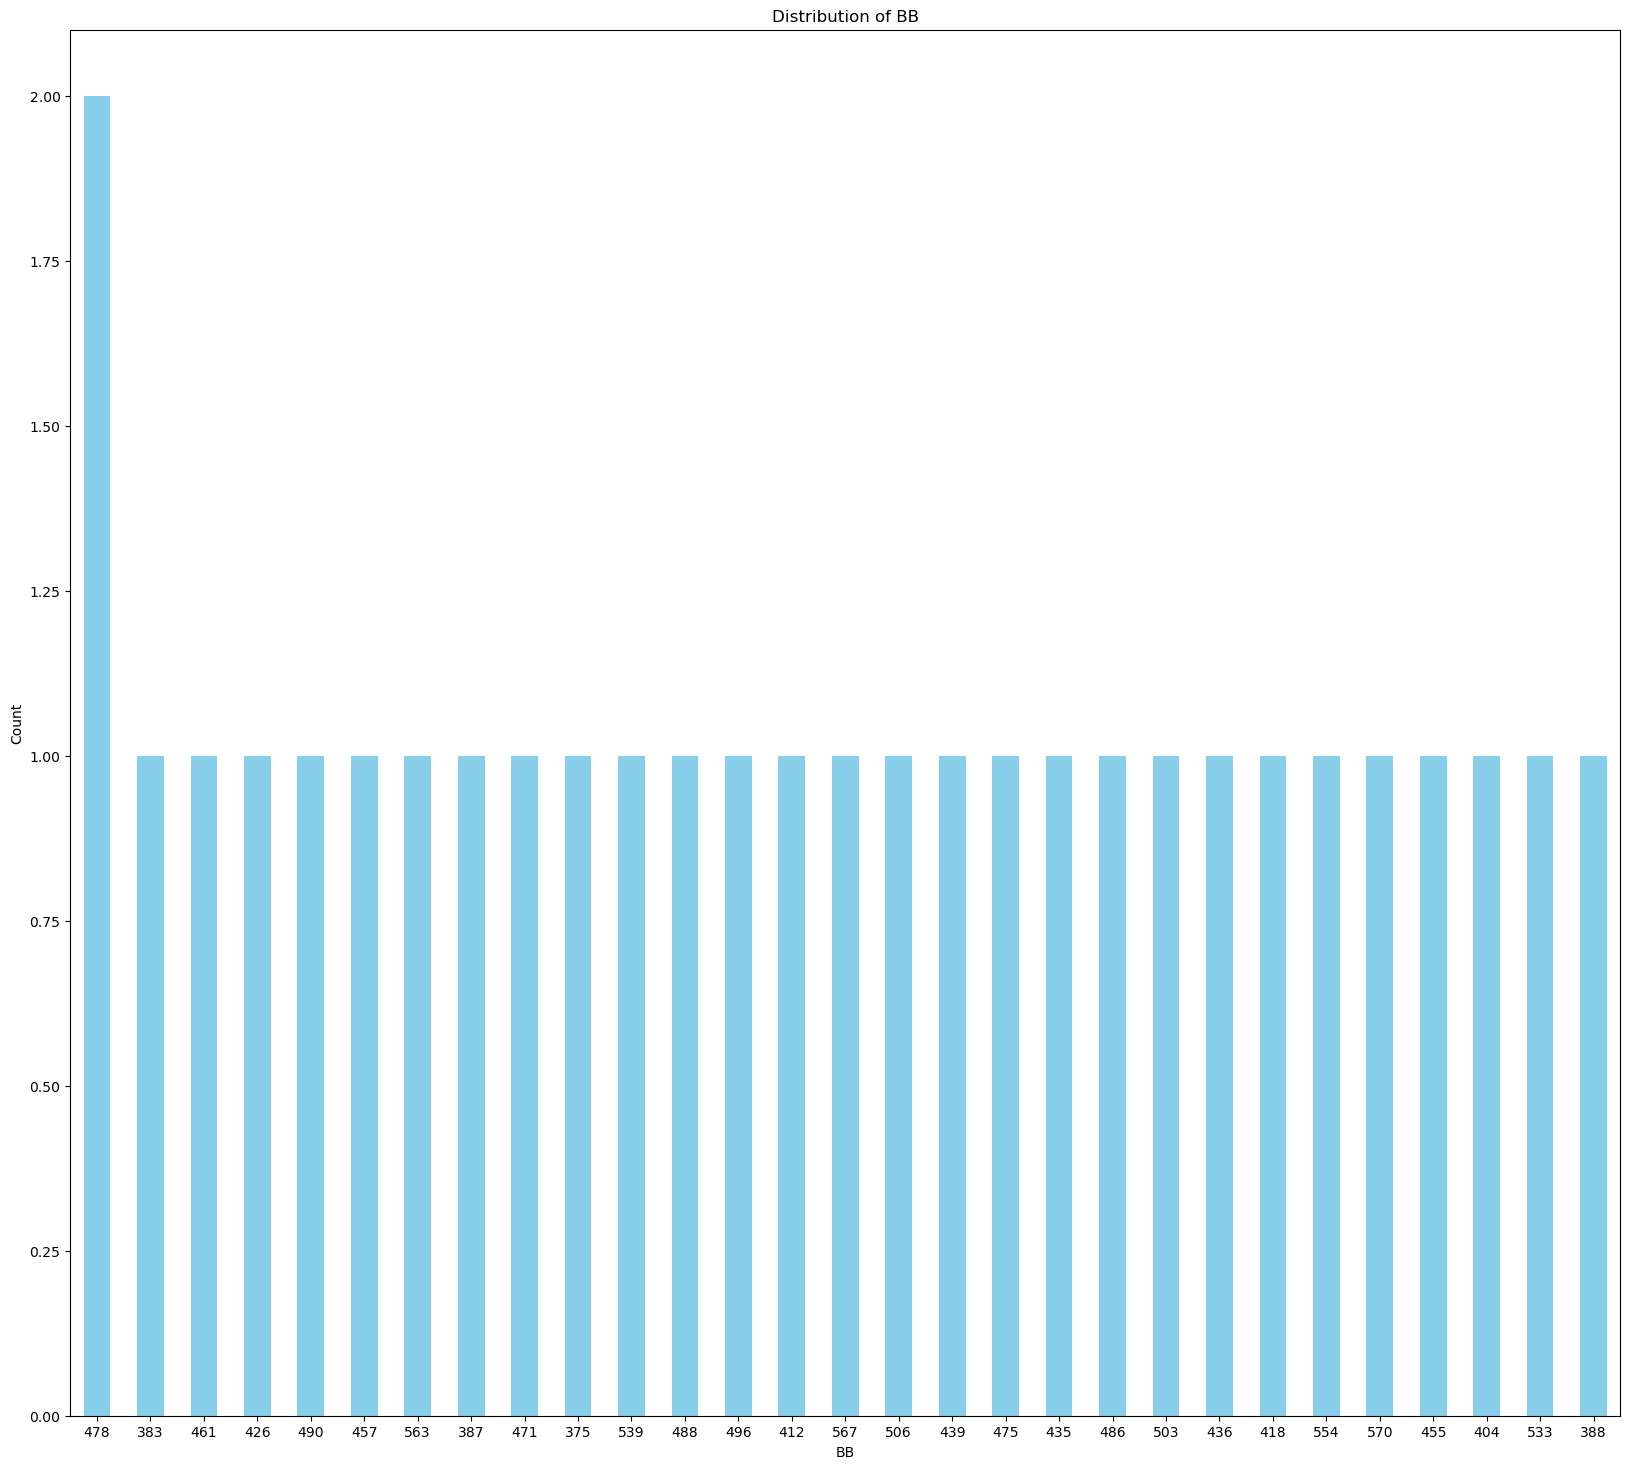

In [41]:
# Assuming df is your DataFrame and it has a column named 'BB'
job_counts = df["BB"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of BB")
plt.xlabel("BB")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

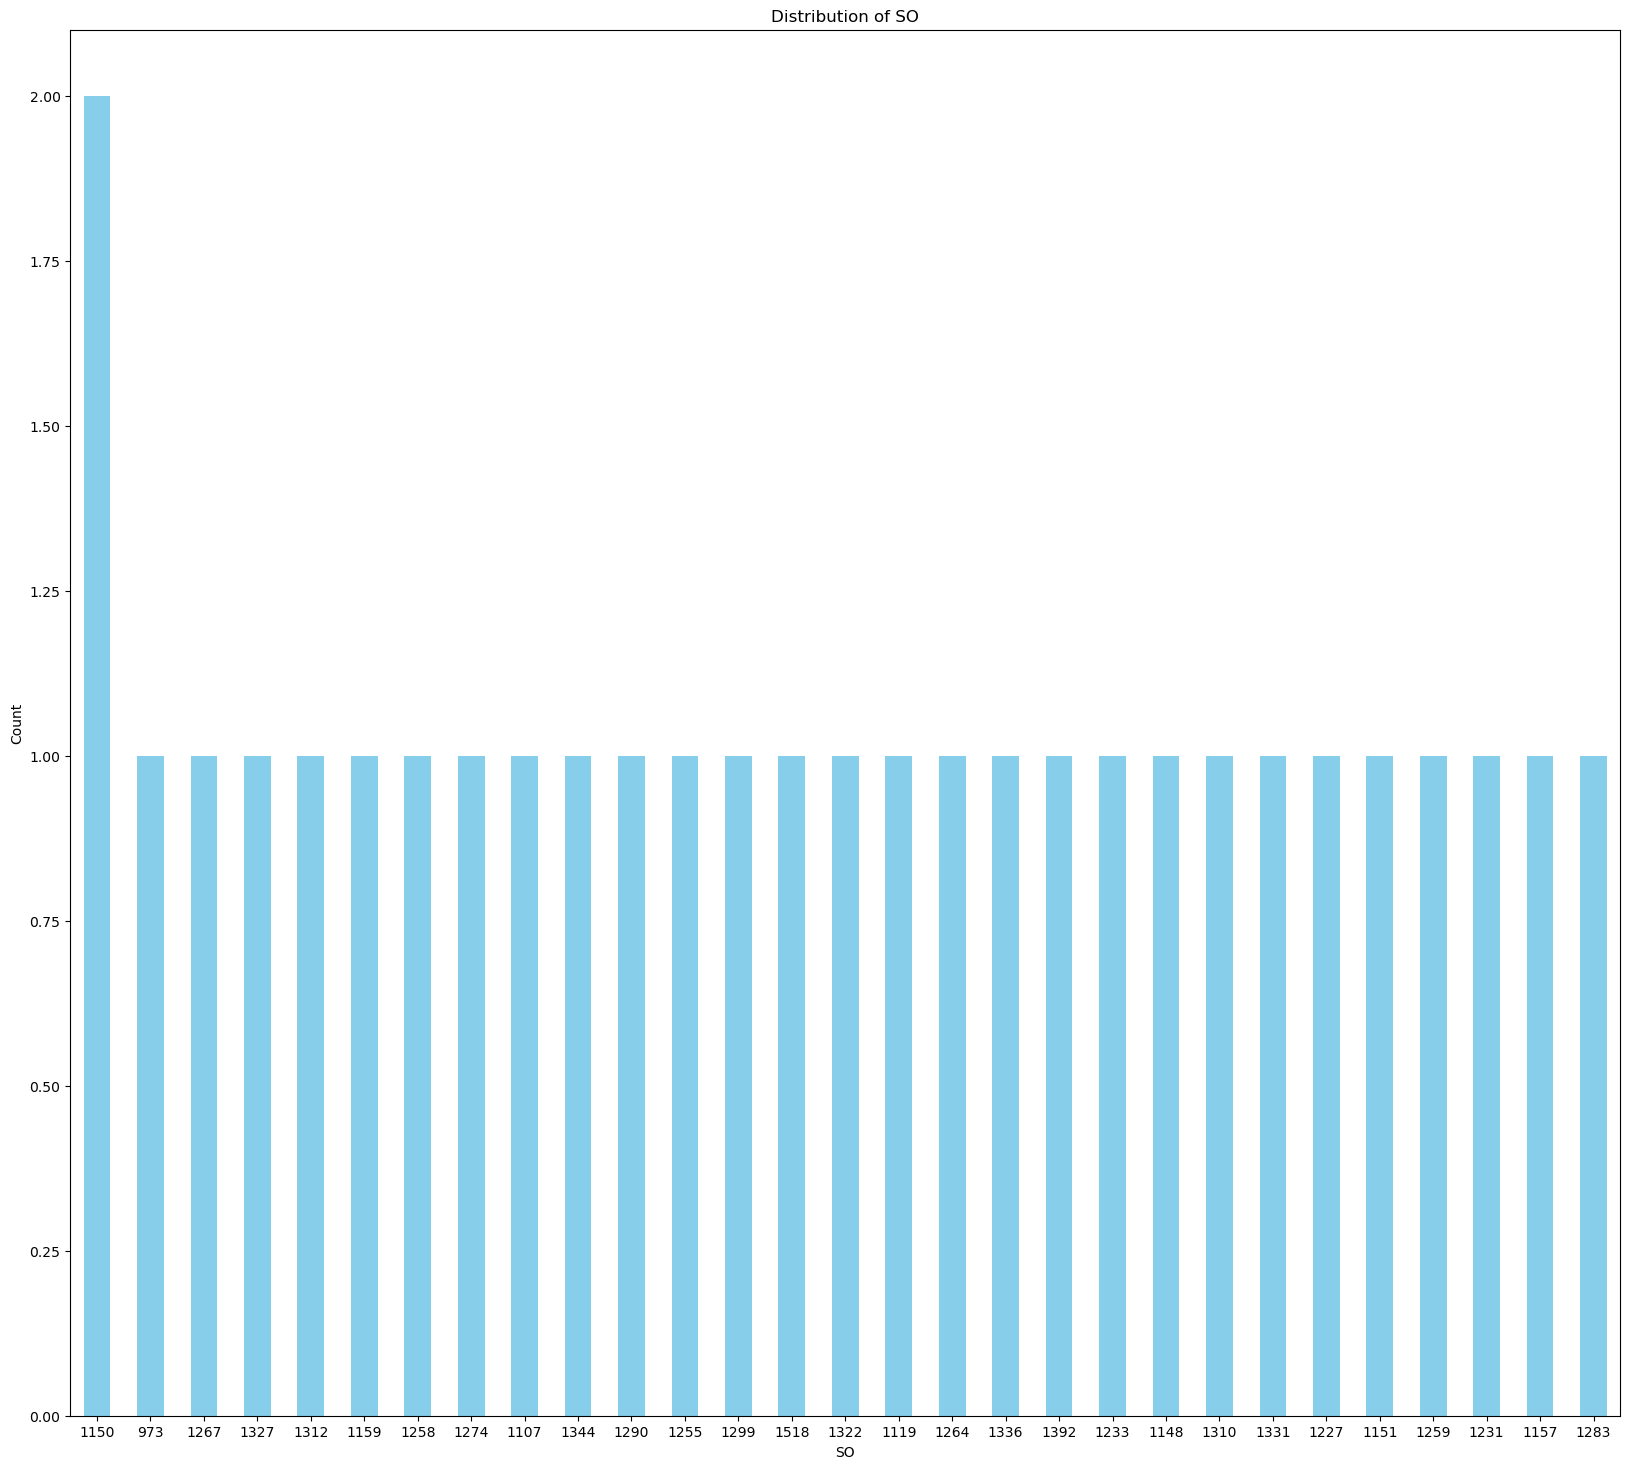

In [42]:
# Assuming df is your DataFrame and it has a column named 'SO'
job_counts = df["SO"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of SO")
plt.xlabel("SO")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

1     7
2     4
7     4
3     3
0     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64


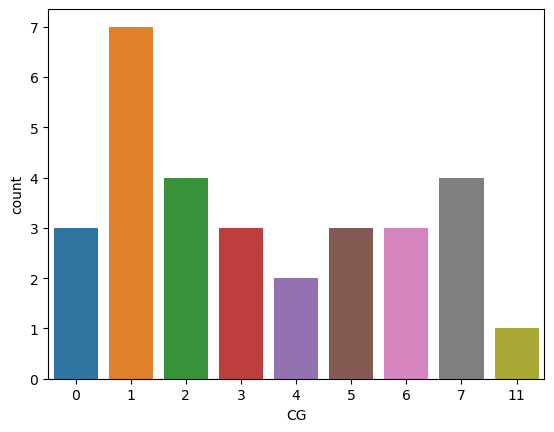

In [43]:
# visualize the number of  CG
ax=sns.countplot(x='CG',data=df)
print(df['CG'].value_counts())

35    4
41    3
45    3
44    2
48    2
40    2
56    1
28    1
47    1
50    1
54    1
62    1
39    1
46    1
60    1
43    1
34    1
37    1
38    1
36    1
Name: SV, dtype: int64


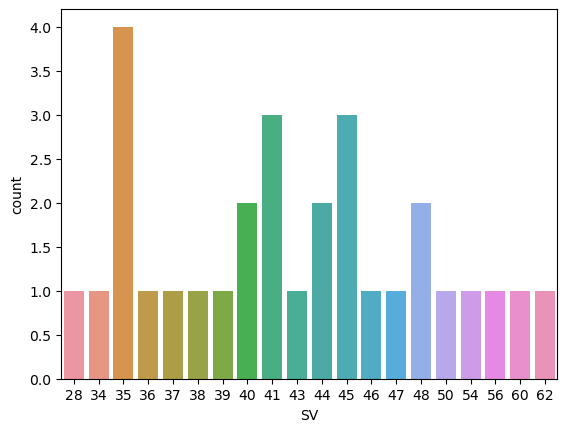

In [44]:
# visualize the number of  SV
ax=sns.countplot(x='SV',data=df)
print(df['SV'].value_counts())

88     3
90     3
86     3
93     2
77     2
95     2
122    1
78     1
75     1
117    1
116    1
111    1
94     1
96     1
126    1
85     1
119    1
97     1
101    1
79     1
92     1
Name: E, dtype: int64


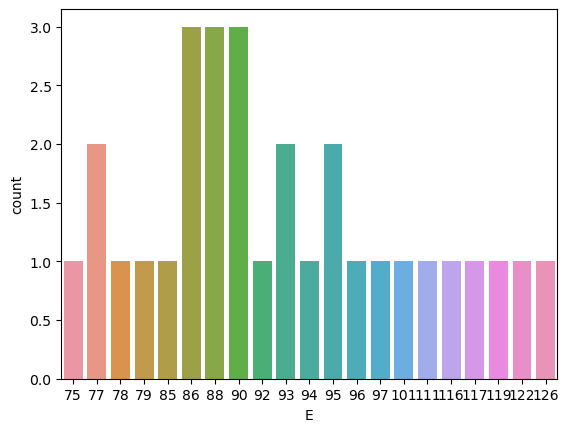

In [45]:
# visualize the number of  E
ax=sns.countplot(x='E',data=df)
print(df['E'].value_counts())

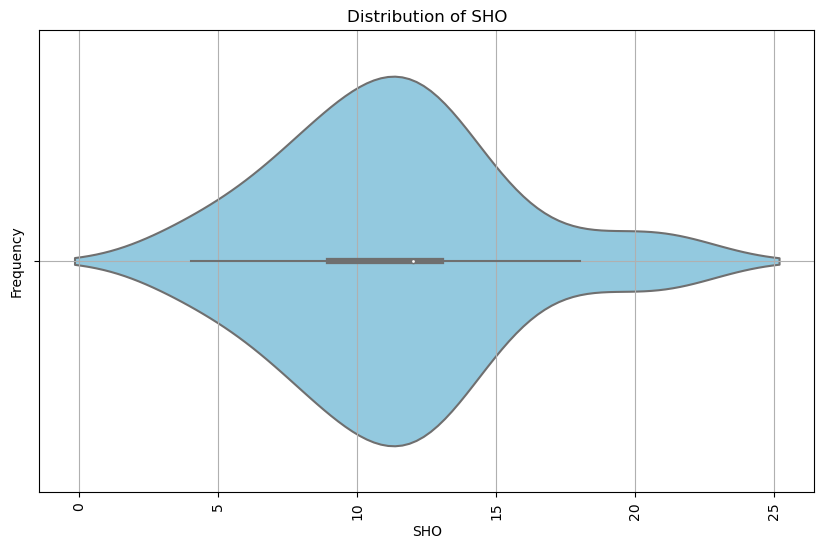

In [46]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['SHO'], color='skyblue')
plt.title('Distribution of SHO')
plt.xlabel('SHO')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

# Relational Analysis

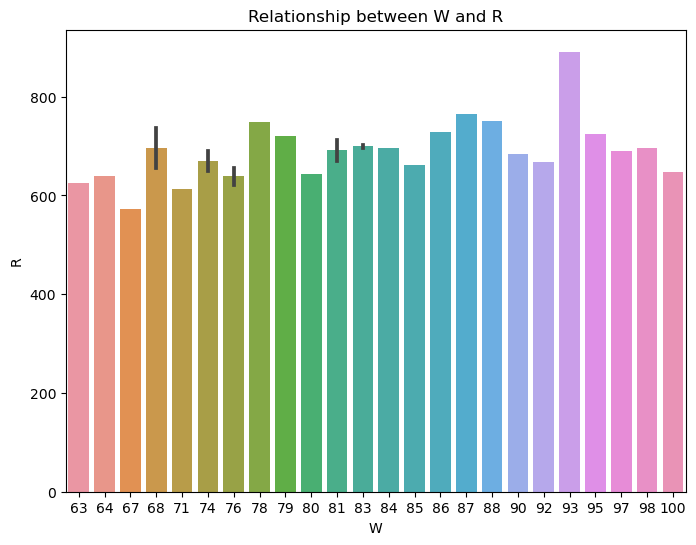

In [47]:
# W columns and R
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="R", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("R")
plt.title("Relationship between W and R")

# Show the plot
plt.show()

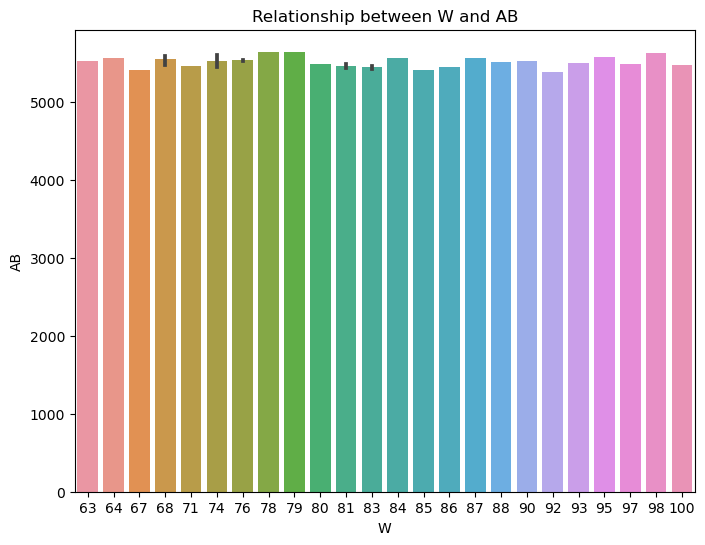

In [48]:
# W columns and AB
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="AB", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("AB")
plt.title("Relationship between W and AB")

# Show the plot
plt.show()

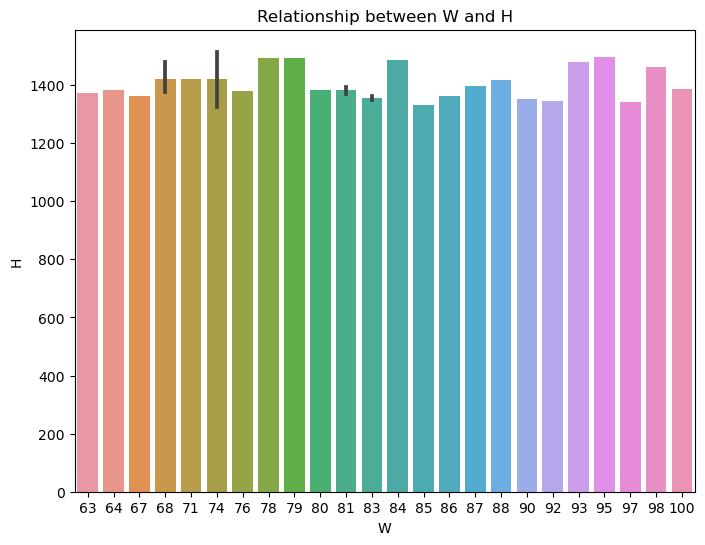

In [49]:
# W columns and H
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="H", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("H")
plt.title("Relationship between W and H")

# Show the plot
plt.show()

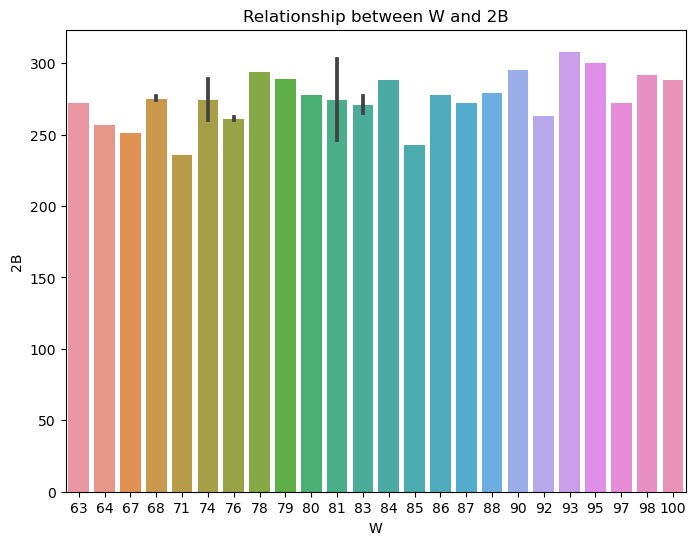

In [50]:
# W columns and 2B
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="2B", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("2B")
plt.title("Relationship between W and 2B")

# Show the plot
plt.show()

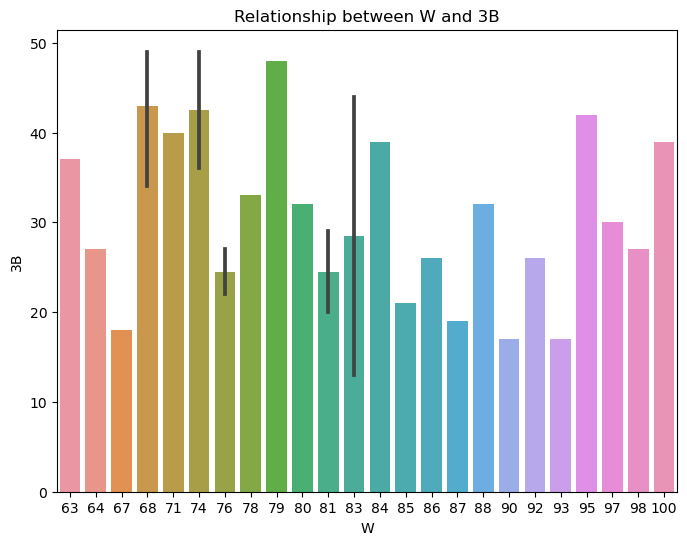

In [51]:
# W columns and 3B
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="3B", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("3B")
plt.title("Relationship between W and 3B")

# Show the plot
plt.show()

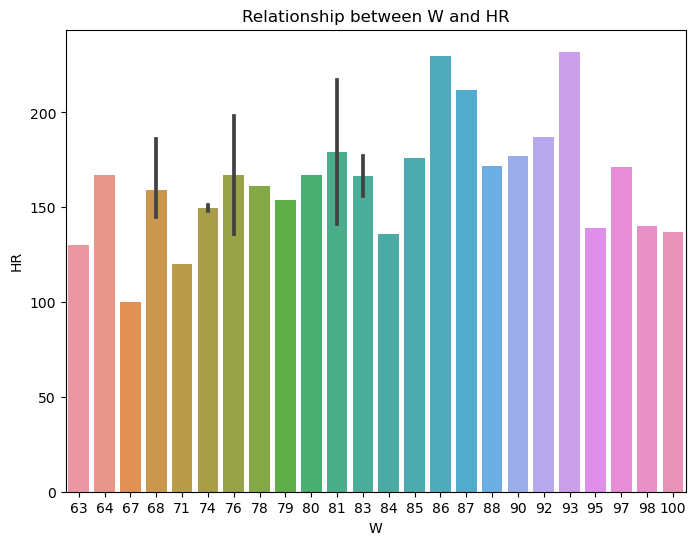

In [52]:
# W columns and HR
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="HR", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("HR")
plt.title("Relationship between W and HR")

# Show the plot
plt.show()

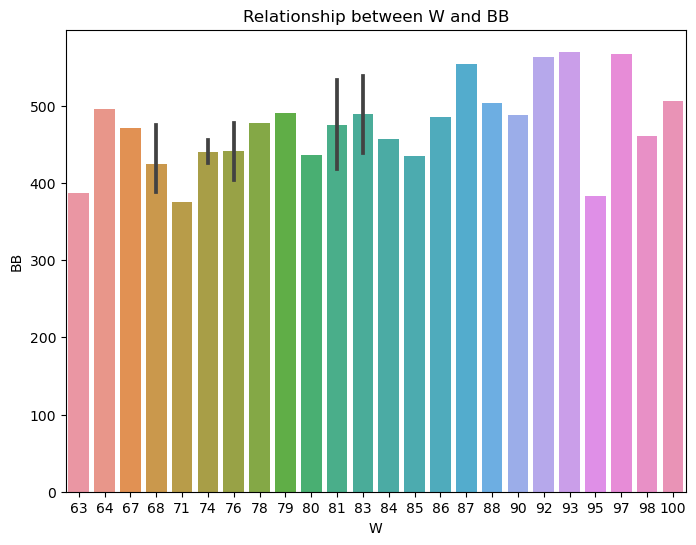

In [53]:
# W columns and BB
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="BB", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("BB")
plt.title("Relationship between W and BB")

# Show the plot
plt.show()

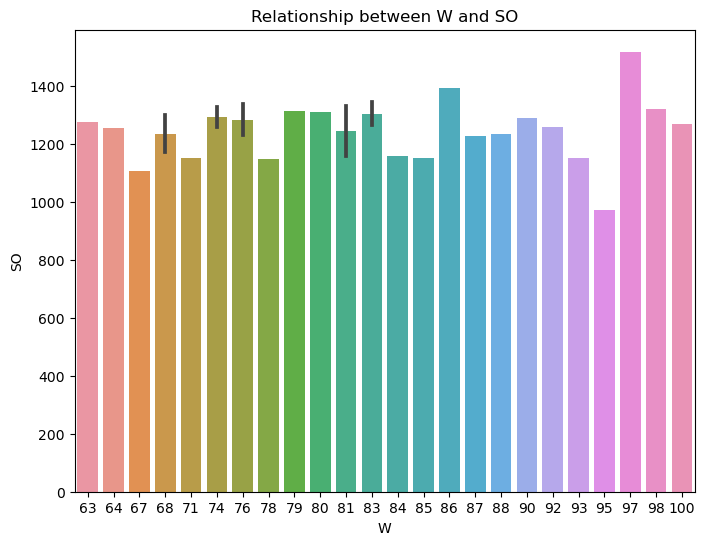

In [54]:
# W columns and SO
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="SO", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("SO")
plt.title("Relationship between W and SO")

# Show the plot
plt.show()

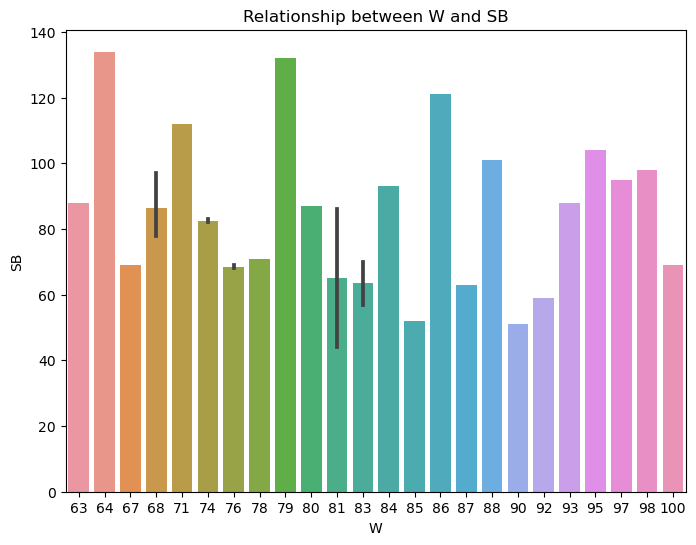

In [55]:
# W columns and SB
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="SB", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("SB")
plt.title("Relationship between W and SB")

# Show the plot
plt.show()

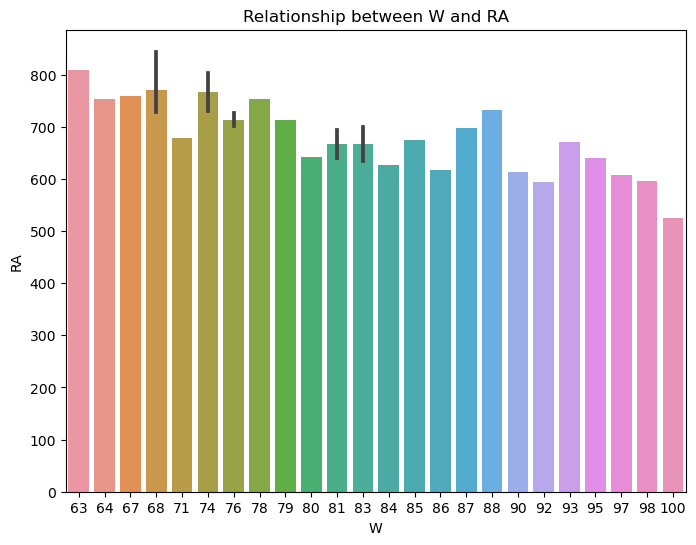

In [56]:
# W columns and RA
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="RA", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("RA")
plt.title("Relationship between W and RA")

# Show the plot
plt.show()

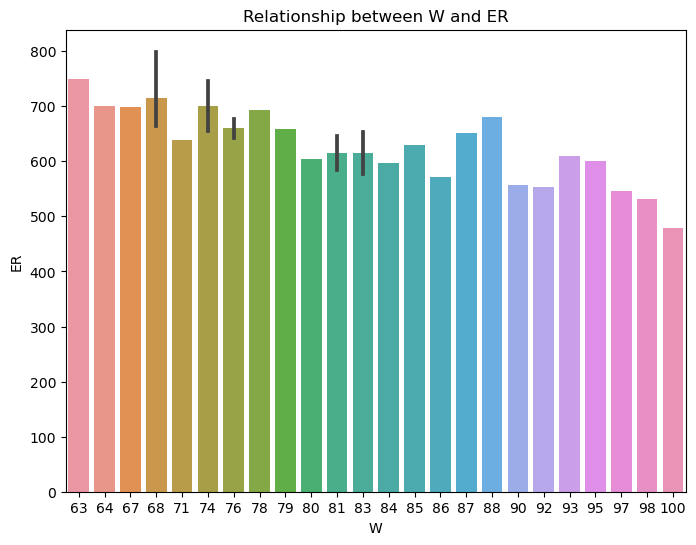

In [57]:
# W columns and ER
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="ER", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("ER")
plt.title("Relationship between W and ER")

# Show the plot
plt.show()

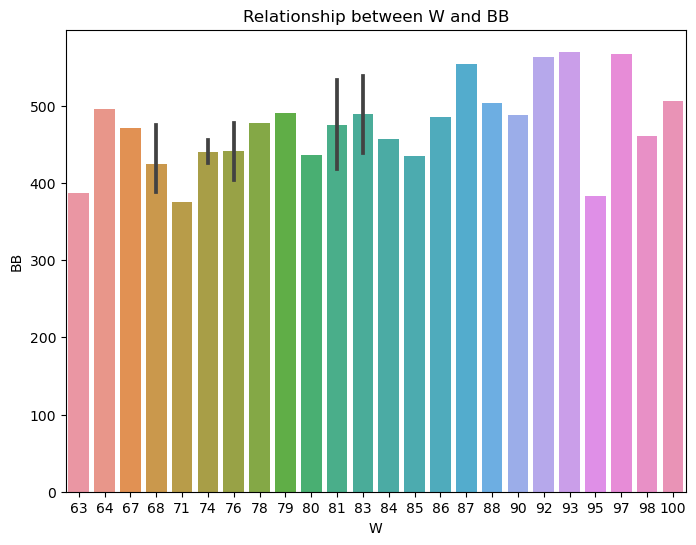

In [58]:
# W columns and BB
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="BB", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("BB")
plt.title("Relationship between W and BB")

# Show the plot
plt.show()

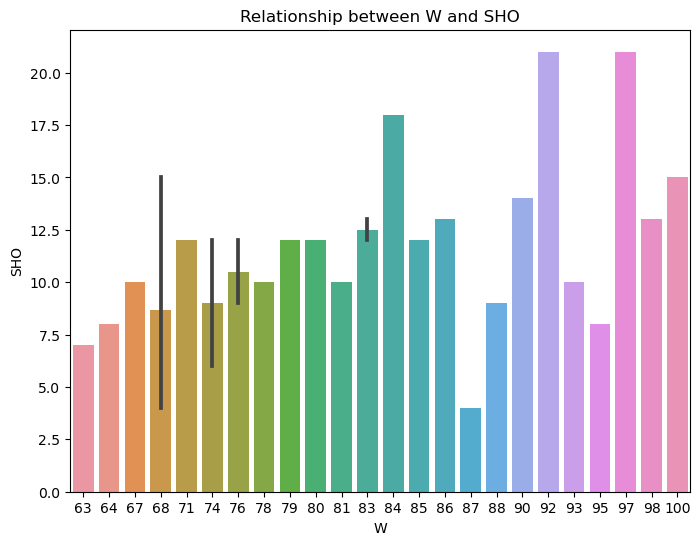

In [59]:
# W columns and SHO
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="SHO", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("SHO")
plt.title("Relationship between W and SHO")

# Show the plot
plt.show()

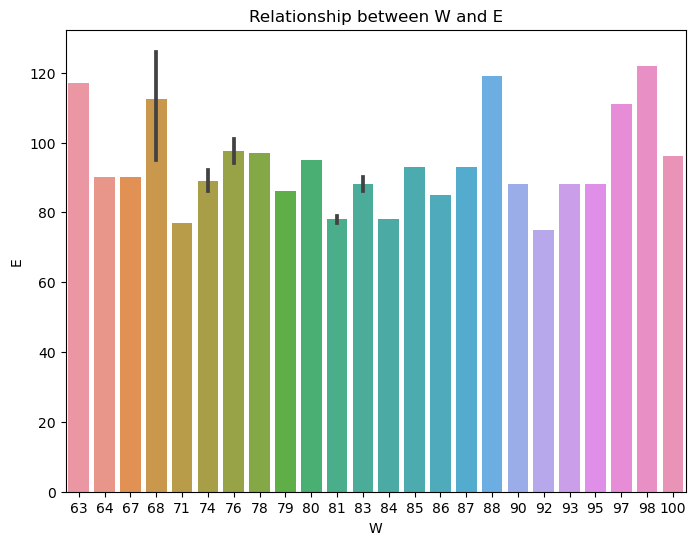

In [60]:
# W columns and E
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="W", y="E", data=df)

# Set labels and title
plt.xlabel("W")
plt.ylabel("E")
plt.title("Relationship between W and E")

# Show the plot
plt.show()

# Checking how the data is distributed in each columns

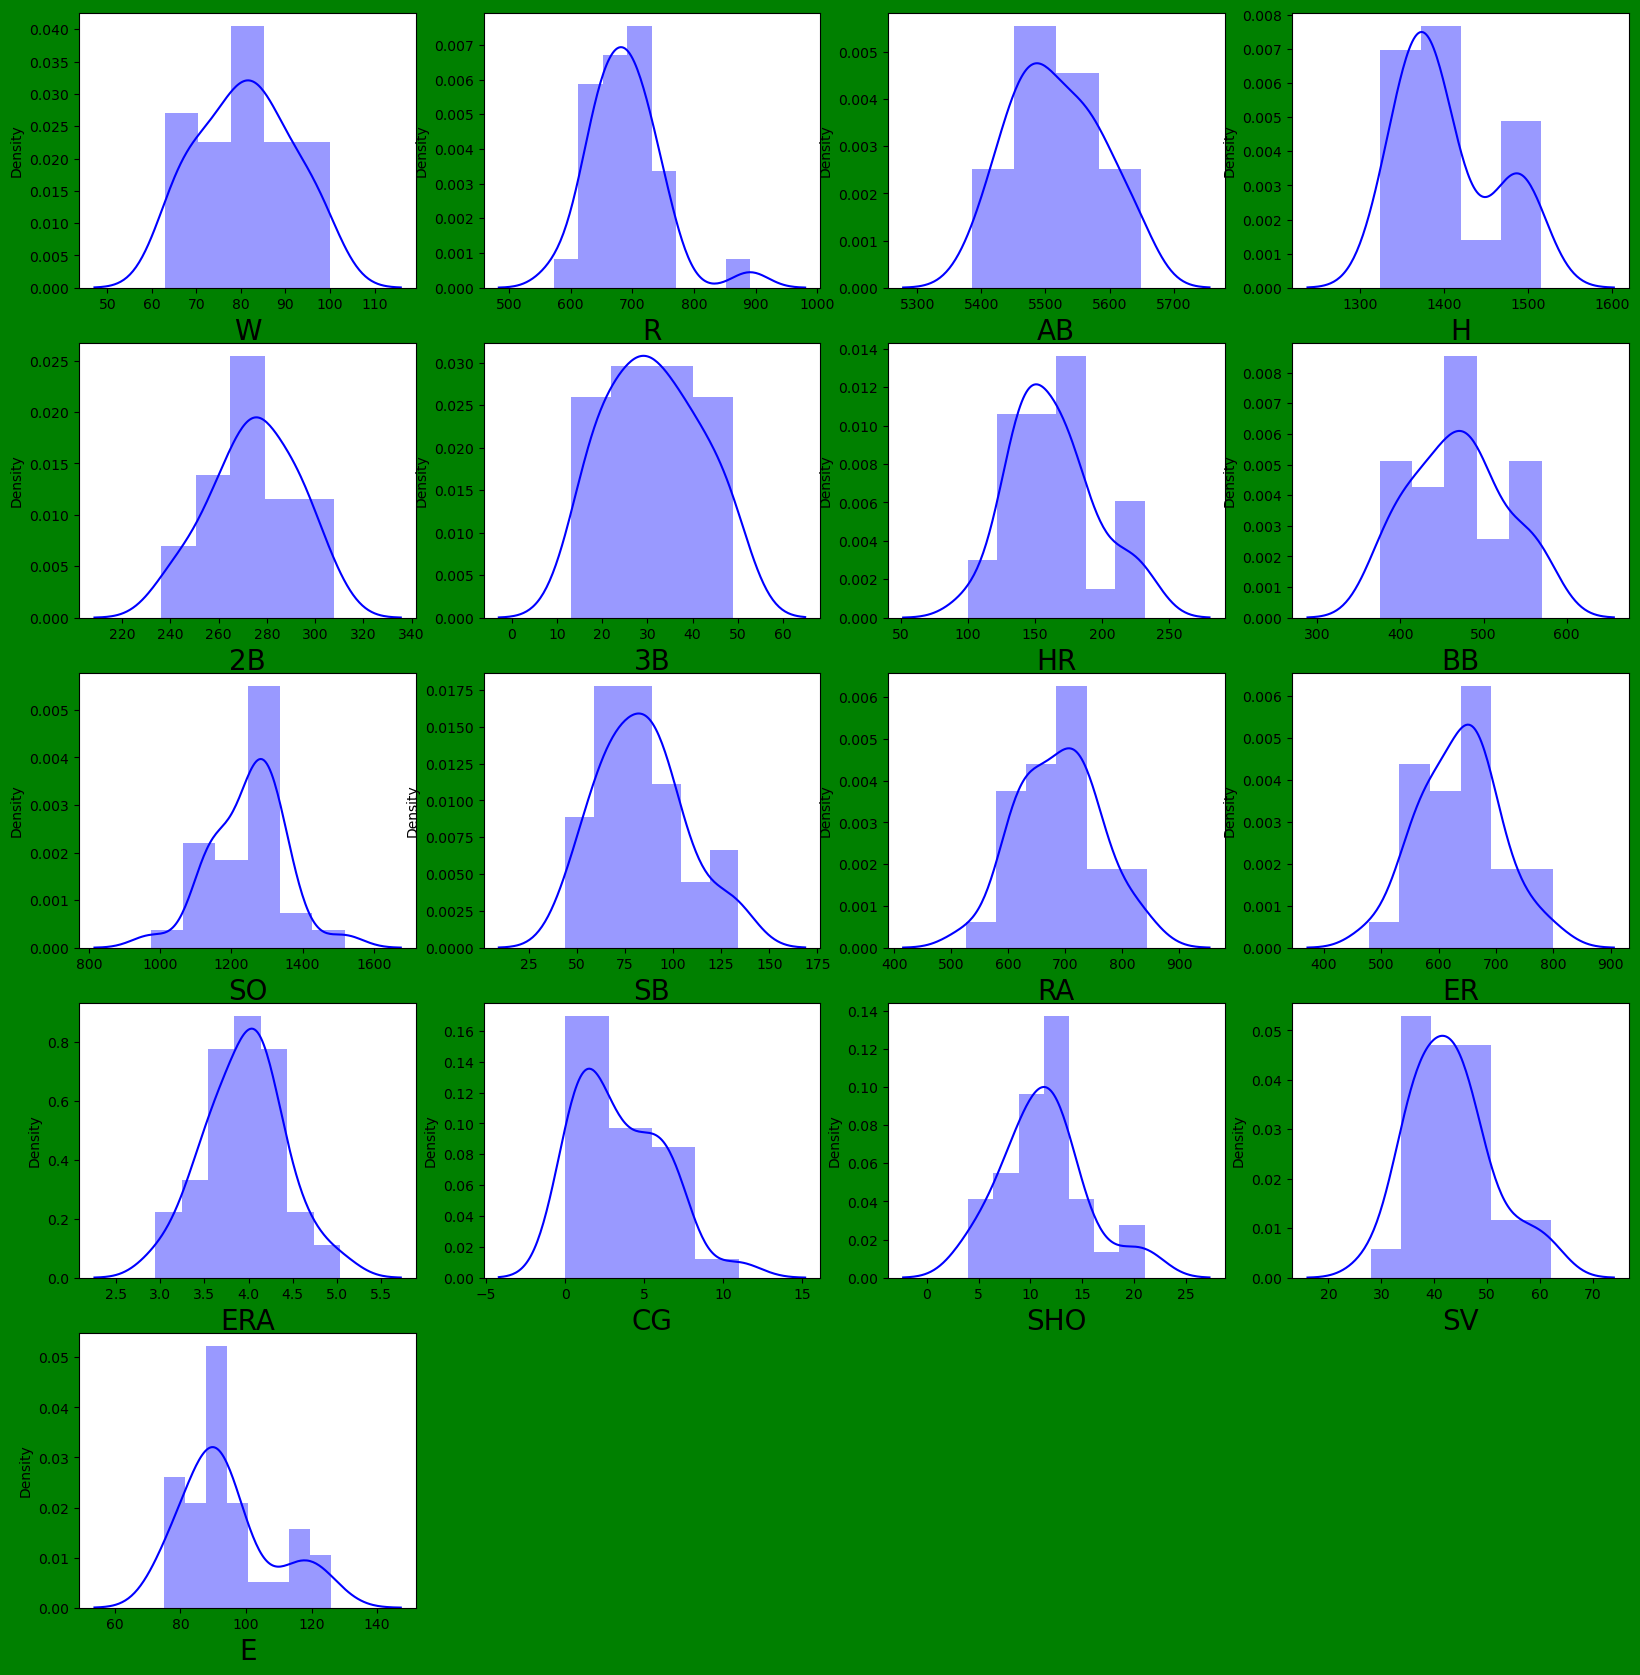

In [61]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Now Checking the outliers

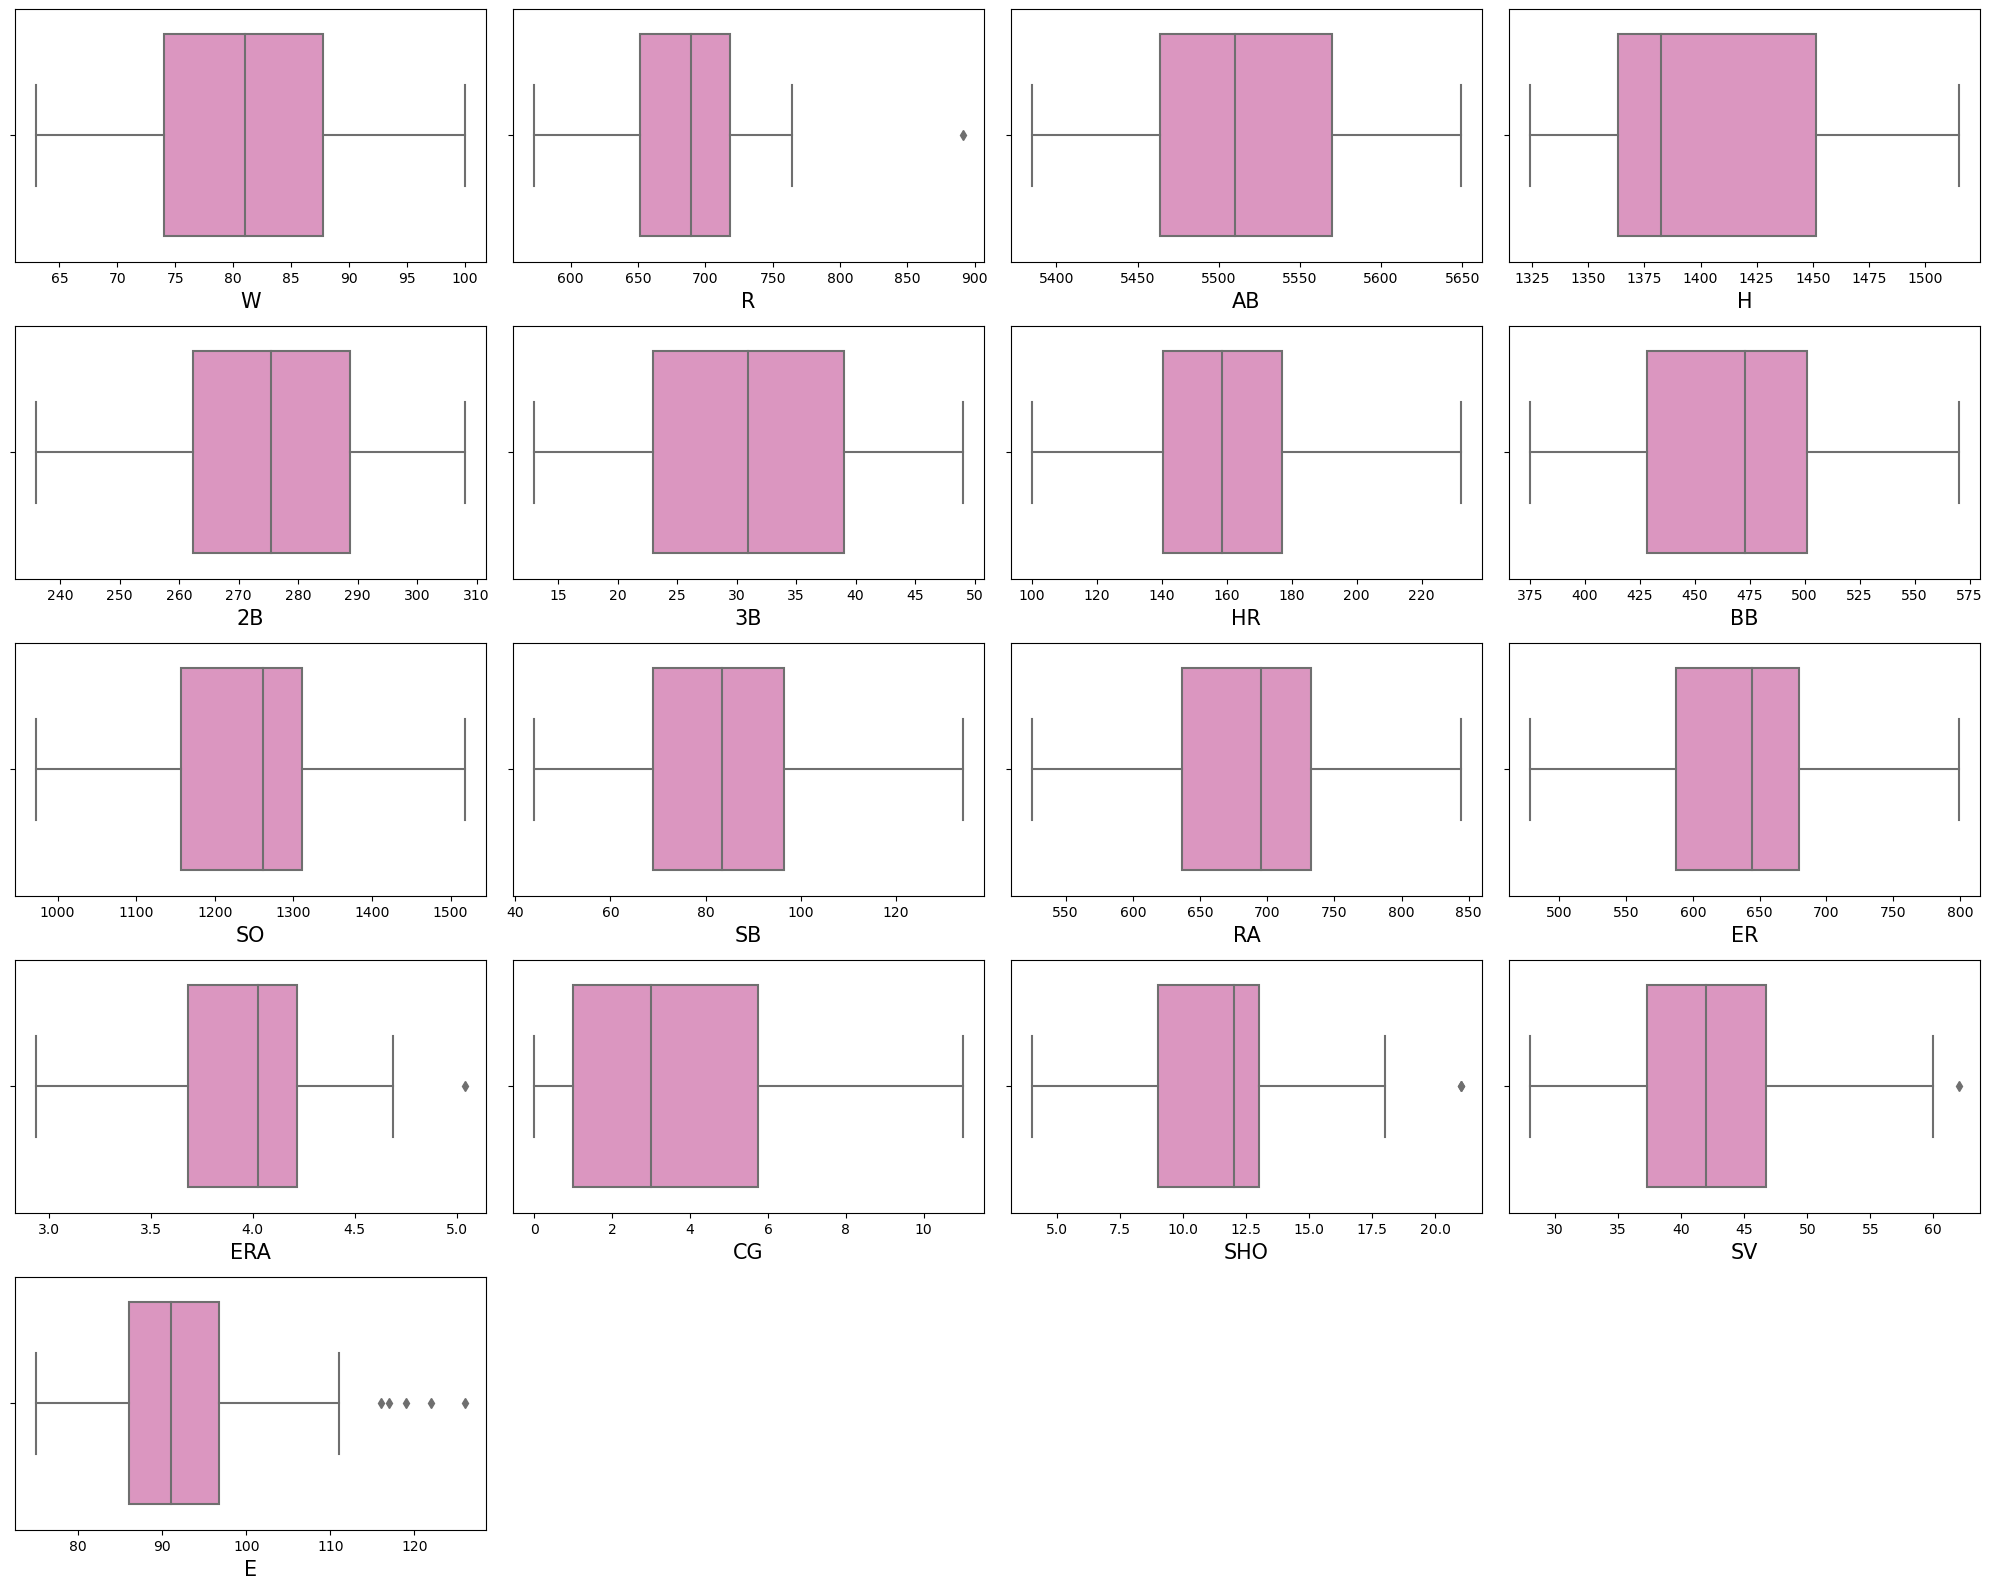

In [62]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

Only three colunns contains some outliers

In [63]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['R', 'ERA','SHO','SV', 'E']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
     W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0   95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1   83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2   81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3   76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4   74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
6   87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7   81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8   80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9   78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
11  86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12  85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13  76  656  5544  1379  262  22  198  47

And now when we use IQR method then the outliers is removed successfully

# Checking for Skewness

In [64]:
# Here all columns data types is numerical so no need to convert 
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

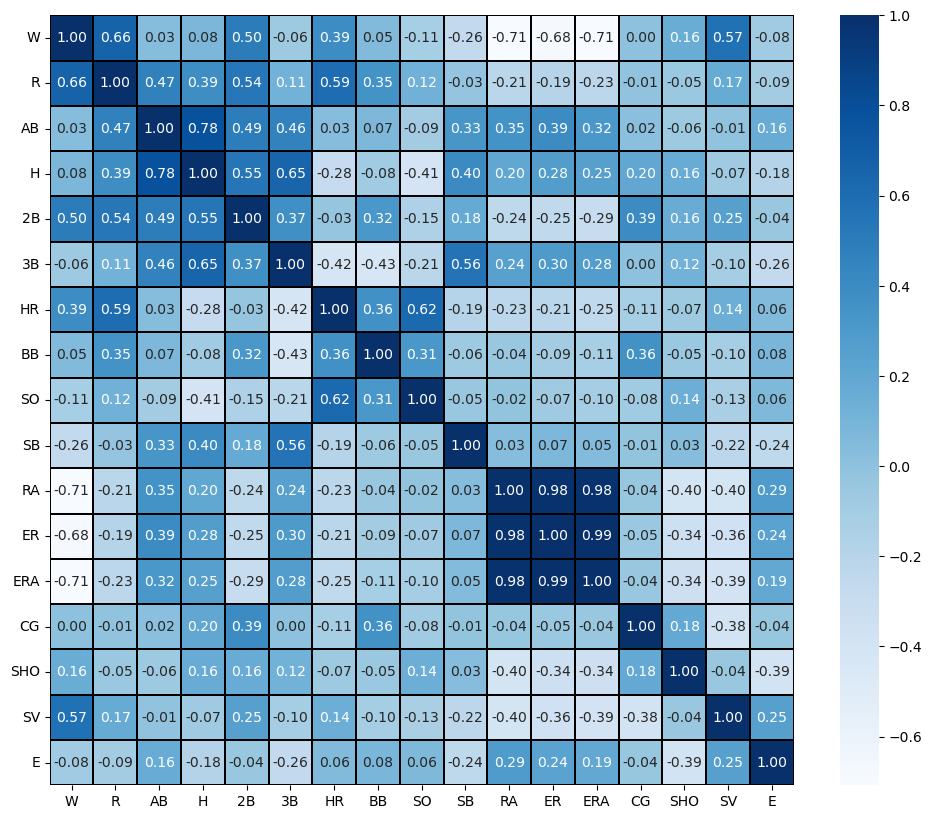

In [65]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f')       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


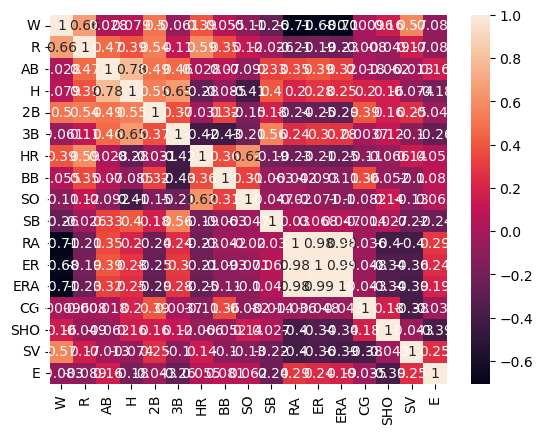

In [66]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [67]:
# Removing Skewnees using cuberoot method
df1['R'] = np.cbrt(df1['R'])
df1['H'] = np.cbrt(df1['H'])
df1['SV'] = np.cbrt(df1['SV'])

# Correlation between the target variable and independent variables

In [68]:
# Now we will check the correlation between features using corr()
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [69]:
df.corr().W.sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

# Separating Feature and labels

In [70]:
# Separating the independent and target varaible into x and y
x = df1.drop("W", axis = 1)
y = df1["W"]
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (20, 16)
Label Dimensions (20,)


# Features scaling using standard scalirization

In [71]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Create a copy of the original DataFrame (for demonstration)
original_x = x.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame 'x' using StandardScaler
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Perform some operations on the scaled data (for demonstration)
# Example: Multiply each feature by 2
x_scaled = x_scaled * 2


# 'x_restored' now contains the original values of 'x' before scaling
print("Original DataFrame (x):")
print(original_x)
print("\nDataFrame after scaling and operation (x_scaled):")
print(x_scaled)

Original DataFrame (x):
           R    AB          H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  \
0   8.979377  5575  11.439506  300  42  139  383   973  104  641  601  3.73   
1   8.862095  5467  11.049365  277  44  156  439  1264   70  700  653  4.07   
2   8.745985  5439  11.173556  303  29  141  533  1157   86  640  584  3.67   
3   8.536178  5533  11.136051  260  27  136  404  1231   68  701  643  3.98   
4   8.832285  5605  11.485173  289  49  151  455  1259   83  803  746  4.64   
6   9.141787  5567  11.178893  272  19  212  554  1227   63  698  652  4.03   
7   8.933669  5485  11.106405  246  20  217  418  1331   44  693  646  4.05   
8   8.635655  5485  11.141425  278  32  167  436  1310   87  642  604  3.74   
9   9.077520  5640  11.434409  294  33  161  478  1148   71  753  694  4.31   
11  9.000000  5459  11.087457  278  26  230  486  1392  121  618  572  3.57   
12  8.710983  5417  11.000000  243  21  176  435  1150   52  675  630  3.94   
13  8.688963  5544  11.13067

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Vif Values"] = [variance_inflation_factor(x_scaled.values,i)for i in range (len(x_scaled.columns))]
vif["Features"] = x_scaled.columns
vif

,Vif Values,Features
0,42.645084,R
1,125.887581,AB
2,27.878033,H
3,27.219914,2B
4,59.675613,3B
5,53.494359,HR
6,17.197754,BB
7,13.626325,SO
8,6.485344,SB
9,328.680126,RA


In [73]:
x_restored = pd.DataFrame(scaler.inverse_transform(x_scaled), columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,8.979377,5575,11.439506,300,42,139,383,973,104,641,601,3.73,2,8,3.825862,88
1,8.862095,5467,11.049365,277,44,156,439,1264,70,700,653,4.07,2,12,3.556893,86
2,8.745985,5439,11.173556,303,29,141,533,1157,86,640,584,3.67,11,10,3.361975,79
3,8.536178,5533,11.136051,260,27,136,404,1231,68,701,643,3.98,7,9,3.332222,101
4,8.832285,5605,11.485173,289,49,151,455,1259,83,803,746,4.64,7,12,3.271066,86
6,9.141787,5567,11.178893,272,19,212,554,1227,63,698,652,4.03,3,4,3.634241,93
7,8.933669,5485,11.106405,246,20,217,418,1331,44,693,646,4.05,0,10,3.503398,77
8,8.635655,5485,11.141425,278,32,167,436,1310,87,642,604,3.74,1,12,3.914868,95
9,9.077520,5640,11.434409,294,33,161,478,1148,71,753,694,4.31,3,10,3.419952,97
11,9.000000,5459,11.087457,278,26,230,486,1392,121,618,572,3.57,5,13,3.391211,85


# Import models

In [74]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Creating train test split

In [75]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    
    # Initializing and training the GradientBoostingRegressor
    GBR = GradientBoostingRegressor()
    GBR.fit(x_train, y_train)
    pred = GBR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.827406644107763 on Random_State 66


In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [77]:
# Assuming x_test, y_test, x_train, y_train are your datasets
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_test shape: (6, 16)
y_test shape: (6,)
x_train shape: (14, 16)
y_train shape: (14,)


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Linear Regression

In [79]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print(LR)
print("R2_Score: ",r2_score(y_test,pred_LR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score:  -1.8520748810231775
R2_Score on training Data:  100.0
Mean Absolute error:- 9.770697129162087
Mean Squared error:- 145.85194044343527
Root Mean Squared Error:- 12.076917671468795


# Random Forest Regressor

In [80]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.6485326453014663
R2_Score on training Data:  88.15102937088855
Mean Absolute error:- 3.7083333333333357
Mean Squared error:- 17.973650000000017
Root Mean Squared Error:- 4.239534172524149


# KNN

In [81]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_knn))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:-",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.25040738728951684
R2_Score on training Data:  42.988233114055376
Mean Absolute error:- 5.0
Mean Squared error:- 38.33333333333332
Root Mean Squared Error:- 6.191391873668902


# Gradient Boosting Regressor

In [82]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.8837081201820097
R2_Score on training Data:  99.99999979928097
Mean Absolute error:- 2.248186939667157
Mean Squared error:- 5.947037520692226
Root Mean Squared Error:- 2.4386548588704033


# Lasso

In [83]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_lasso))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared error:-",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_Score:  0.16527504446421848
R2_Score on training Data:  97.62530285008067
Mean Absolute error:- 5.0819177427257936
Mean Squared error:- 42.68690675392705
Root Mean Squared Error:- 6.533521772668019


# DecisionTreeRegressor

In [84]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  -0.036393264530146796
R2_Score on training Data:  100.0
Mean Absolute error:- 6.666666666666667
Mean Squared error:- 53.0
Root Mean Squared Error:- 7.280109889280518


# Extra Trees Regressor

In [85]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_etr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_etr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.6245828354155349
R2_Score on training Data:  100.0
Mean Absolute error:- 3.7050000000000005
Mean Squared error:- 19.19841666666667
Root Mean Squared Error:- 4.381599783944977


# Checking Cross validation score of each algorithm

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
score=cross_val_score(LR,x,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_LR)-score.mean())*100)

[ -0.34764406  -3.775904   -14.29054042  -1.39022569 -15.93545488]
-7.147953808062485
Difference between R2 score and cross validation score is- 529.5878927039307


In [88]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[ 0.25294685  0.66741294  0.49067023  0.17133244 -0.01429937]
0.3136126204336399
Difference between R2 score and cross validation score is- 33.49200248678264


In [89]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_knn)-score2.mean())*100)

[-0.78793325 -0.14352941 -0.45498328  0.19990244 -0.2521519 ]
-0.2877390793639997
Difference between R2 score and cross validation score is- 53.81464666535165


In [90]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[ 0.23315985  0.71378771  0.46034667  0.19795281 -0.65334258]
0.19038089352736604
Difference between R2 score and cross validation score is- 69.33272266546437


In [91]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_lasso)-score4.mean())*100)

[ 0.35799162 -0.05206352 -0.68371117 -0.08220278  0.60630901]
0.029264632201029393
Difference between R2 score and cross validation score is- 13.601041226318907


In [92]:
score6 =cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_etr)-score6.mean())*100)

[ 0.25415507 -0.2634      0.23115719  0.3131061   0.07214367]
0.12143240593716864
Difference between R2 score and cross validation score is- 50.31504294783663


From difference between R2 score and cross validation score computed on R2 socre we canconclude that GradientBoostingRegressor as our best fiiting and best performing model

# Gradient Booster Regressor is Best Model

In [95]:
GBR.fit(x_train,y_train)
pred = GBR.predict(x_test)
print("R2_Score: ",r2_score(y_test,pred))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred))
print("Mean Squared error:-",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_Score:  0.8884525205032369
R2_Score on training Data:  100.0
Mean Absolute error:- 1.8762216260878901
Mean Squared error:- 5.704414159820581
Root Mean Squared Error:- 2.388391542402665


# Saving the model using joblib

In [96]:
# Saving the model
import joblib
joblib.dump(GBR,"Baseball_case.pkl")

['Baseball_case.pkl']

In [97]:
import pickle
filename = "Baseball_case.pkl"
pickle.dump(GBR, open(filename,'wb'))  #Saved model

# Predicting the saved model

In [98]:
load_model = pickle.load(open("Baseball_case.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

88.84525205032368


Almost 90 % Accuracy 

# Conclusion

In [99]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5
Predicted,81.344768,70.49083,74.074745,83.073904,76.145809,84.035383
Original,83.000000,67.00000,74.000000,87.000000,76.000000,86.000000


In [100]:
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,8.979377,5575,11.439506,300,42,139,383,973,104,641,601,3.73,2,8,3.825862,88
1,83,8.862095,5467,11.049365,277,44,156,439,1264,70,700,653,4.07,2,12,3.556893,86
2,81,8.745985,5439,11.173556,303,29,141,533,1157,86,640,584,3.67,11,10,3.361975,79
3,76,8.536178,5533,11.136051,260,27,136,404,1231,68,701,643,3.98,7,9,3.332222,101
4,74,8.832285,5605,11.485173,289,49,151,455,1259,83,803,746,4.64,7,12,3.271066,86
6,87,9.141787,5567,11.178893,272,19,212,554,1227,63,698,652,4.03,3,4,3.634241,93
7,81,8.933669,5485,11.106405,246,20,217,418,1331,44,693,646,4.05,0,10,3.503398,77
8,80,8.635655,5485,11.141425,278,32,167,436,1310,87,642,604,3.74,1,12,3.914868,95
9,78,9.077520,5640,11.434409,294,33,161,478,1148,71,753,694,4.31,3,10,3.419952,97
11,86,9.000000,5459,11.087457,278,26,230,486,1392,121,618,572,3.57,5,13,3.391211,85


# Predicted the Baseball winning 

In [103]:
# Assuming the necessary libraries and the trained SVR model have already been imported and trained
# The SVR model is named 'Model'

# Input data for prediction
input_data_baseball = [8.617739,5571,11.138739,257,27,167,496,1255,134,754,700,4.33,2,8,3.271066,90]

# Make a prediction using the trained SVR model
prediction = GBR.predict([input_data_baseball])  # Make sure to pass the input data as a list of lists

# Print the input data and predicted Baseball winning
print("Input Data (Numerical):", input_data_baseball)
print("Predicted number of wins:", prediction[0])  # Assuming prediction returns a list or array


Input Data (Numerical): [8.617739, 5571, 11.138739, 257, 27, 167, 496, 1255, 134, 754, 700, 4.33, 2, 8, 3.271066, 90]
Predicted number of wins: 64.0004901985132


# Thank You